#Get data

In [ ]:
#GDrive Link for the data set : --> https://drive.google.com/file/d/1FljXluMfKjGiQRJnz00ZGC6tVmaonos2/view?usp=sharing
#GitHub Link for the data set : --> https://github.com/Suraj124/Hindi_Character_Recognition/blob/main/Dataset/DevanagariHandwrittenCharacterDataset.zip
def get_full_dataset():

  import os
  import zipfile
  from IPython.display import HTML

  if not os.path.exists("DevanagariHandwrittenCharacterDataset.zip"):
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Dataset is not downloaded</h2><br>"))

    try:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Downloading the dataset...</h2><br>"))
      
      !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1FljXluMfKjGiQRJnz00ZGC6tVmaonos2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1FljXluMfKjGiQRJnz00ZGC6tVmaonos2" -O DevanagariHandwrittenCharacterDataset.zip && rm -rf /tmp/cookies.txt

      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset successfully downloaded 😃</h2><br>"))
      try:
        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Unzipping the dataset...</h2><br></center>"))
    
        !unzip -q /content/DevanagariHandwrittenCharacterDataset.zip

        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset successfully unzipped 😄</h2><br>"))
      except:
        display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Error!!! in Unzipping the dataset</h2><br>"))
    except:
      display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#ff0000;\">Error!!! in downloading the dataset</h2><br>"))
  else:
    display(HTML("<h2 style=\"font-family:Trebuchet MS;color:#4f8bd6;\">Dataset already exist... Skipping downloading.</h2><br>"))

In [ ]:
get_full_dataset() # Downloading the dataset 

--2022-09-03 15:42:48--  https://docs.google.com/uc?export=download&confirm=t&id=1FljXluMfKjGiQRJnz00ZGC6tVmaonos2
Resolving docs.google.com (docs.google.com)... 142.251.10.139, 142.251.10.102, 142.251.10.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lotsjmt4dlob6achgd2471nnlp53v0d3/1662219750000/06055040978356046403/*/1FljXluMfKjGiQRJnz00ZGC6tVmaonos2?e=download&uuid=47016f17-63c2-4522-9097-28feb0336023 [following]
--2022-09-03 15:42:49--  https://doc-0c-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lotsjmt4dlob6achgd2471nnlp53v0d3/1662219750000/06055040978356046403/*/1FljXluMfKjGiQRJnz00ZGC6tVmaonos2?e=download&uuid=47016f17-63c2-4522-9097-28feb0336023
Resolving doc-0c-a4-docs.googleusercontent.com (doc-0c-a4-docs.googleusercontent.com)... 74.125.200.132, 

In [ ]:
# Importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score,classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm

In [ ]:
# Set up the directories for train and test data
training_directory_path = "/content/DevanagariHandwrittenCharacterDataset/Train"
testing_directory_path = "/content/DevanagariHandwrittenCharacterDataset/Test"

In [ ]:
#Import the data from the directories, then transform them into batches
training_dataset = image_dataset_from_directory(directory=training_directory_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical')

testting_dataset = image_dataset_from_directory(directory=testing_directory_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

Found 78200 files belonging to 46 classes.
Found 13800 files belonging to 46 classes.


In [ ]:
# Check the datatype of training dataset
training_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 46), dtype=tf.float32, name=None))>

As seen in the output above :

* Our images have the tensor shape of `(None, 32, 32, 3)`, where `None` is the batch size, `32` is the height and width, and 3 is the color channels.

* Tensor shape of labels is denoted by `(None, 46)`, where `None `is the batch size and 46 is the total number of classes/labels. 


The `take()` method is one that we could use if we were interested in viewing the batch of data

In [ ]:
for images , labels in training_dataset.take(1):
  print(images.shape)
  print(labels.shape)

(32, 32, 32, 3)
(32, 46)


In [ ]:
for images , labels in training_dataset.take(1):
  print(f"Image tensor :\n {images[0]}")
  print(f"Label tensor :\n {labels[0]}")

Image tensor :
 [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Label tensor :
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Take note of the fact that the output for the image arrays is a tensor of pixel values, whereas the output for the `labels` is a `one-hot encoding`.

In [ ]:
# The names of each character, in the correct order for the Hindi Devnagri script
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split()                                                                                                        

In [ ]:
class_names_=training_dataset.class_names    # get the class names according to our training dataset 

In [ ]:
print(class_names_)   # Display the class names

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [ ]:
# Sort the hindi character names according to training dataset
hindi_character_=[]
for char in class_names_[:-10]:
  position = int(char.split("_")[1])
  hindi_character_.append(hindi_character[position-1])

hindi_character_.extend(hindi_character[-10:])

In [ ]:
print(hindi_character_)  # Display Hindi character according to training dataset

['ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'क', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'ख', 'श', 'ष', 'स', 'ह', 'ॠ', 'त्र', 'ज्ञ', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']


In [ ]:
# Download Hindi Fonts to display is matplotlib plots
def get_hindi_fonts():

  if not os.path.exists("Nirmala.ttf"):
    print("Downloading Hindi fonts...")
    print("Downloading the Nirmala.tff ...")
    !wget https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip
    !unzip -q nirmala-ui.zip

  else:   
    print("Nirmala.ttf already exist. Skipping downloading...")

get_hindi_fonts()

--2022-09-03 15:43:05--  https://www.wfonts.com/download/data/2016/04/29/nirmala-ui/nirmala-ui.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 686493 (670K) [application/octetstream]
Saving to: ‘nirmala-ui.zip’

nirmala-ui.zip      100%[===================>] 670.40K   326KB/s    in 2.1s    

2022-09-03 15:43:09 (326 KB/s) - ‘nirmala-ui.zip’ saved [686493/686493]



# Show some images of our dataset

In [ ]:
# This function will take one batch and display all of the images and labels that are associated with that batch.
def display_images_from_dataset(data , subplots = (8,4) , figsize = (12,20) , fontsize = 20):
  '''
  data : From where the images to be displayed
  subplot : No of plot to be displayed (Default : subplot = (8,4) )
  figsize : Size of figure (Default : (12,20) )
  fontsize : Size of text (Default : fontsize = 20 )
  '''

  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('/content/Nirmala.ttf'))  # Helpful in displaying Hindi character in matplotlib

  plt.figure(figsize=figsize)
  for images , labels in data.take(1):
    for i in range(subplots[0]*subplots[1]):
      plt.subplot(subplots[0],subplots[1],i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      plt.title(hindi_character_[tf.argmax(labels[i]).numpy()],fontproperties=hindi_font,fontsize=fontsize)  # We are taking argmax of labels as labels are One-Hot encoded
      plt.axis(False)
  
  plt.show()


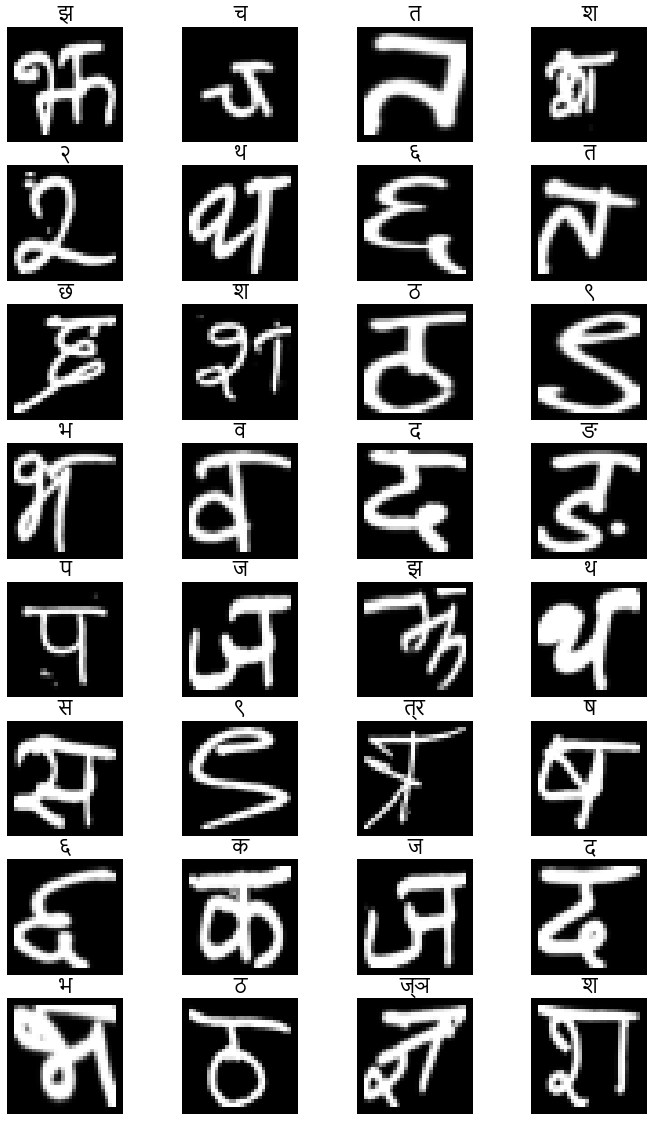

In [ ]:
display_images_from_dataset(training_dataset)

#Split training data in train and validation

In [ ]:
# Data will be partitioned into training and validation sets by this function.
def train_validation_split(data,val_size=0.15):
  '''
  Parameters :
  -----------------------
  data : data to be split into train and validation
  val_size : Percentage of data to be in validation and rest in training (Default : 15 % data in validation and 85 % in training)

  Return :
  ----------------------
  Return train and validation dataset
  '''

  training_size = len(data)

  training_data = data.take(int((1-val_size)*training_size))   # 85 % data in training
  validation_data = data.skip(int((1-val_size)*training_size)) # 15 % data in validation

  return training_data , validation_data

In [ ]:
# Spliting the training dataset into train and validation data
training_data , validation_data = train_validation_split(training_dataset) 

We plan to improve performance using the following strategies.
- **Caching** : The `tf.data.Dataset.cache` transformation can cache a dataset, either in memory or on local storage. This will save some operations (like file opening and data reading) from being executed during each epoch.

- **Prefetching** : Prefetching overlaps the preprocessing and model execution of a training step. While the model is executing training step `s`, the input pipeline is reading the data for step `s+1`. Doing so reduces the step time to the maximum  of the training and the time it takes to extract the data.

In [ ]:
training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
testting_dataset = testting_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Model : 1 --> LeNet
Model 1 is an entirely LetNet-based architectural model.

## Defining the callbacks

In [ ]:
import datetime

# TensorBoard CallBack

# The following events are logged using this callback for TensorBoard:
#  Plots that summarize the metrics. A illustration of the training graph.

log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_1/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)  


# ModelCheckPoint CallBack

# To save a model or weights at specified intervals (in a checkpoint file), 
# allowing the model or weights to be loaded at a later time to resume training from the point at which they were saved.

checkpoint_path = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"LeNet_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')

# EarlyStopping Callback

# Stop training when a metric that is being watched has stopped getting better.

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau

# Reduce the rate of learning when a metric stops improving.

reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([   # Divide the image array by 255 to normalize it.(Bring the pixel values in the same scale)
  layers.Rescaling(1./255),
])

In [ ]:
# This model is completely influenced by the architecture of LeNet.
model_1 = tf.keras.Sequential([
                rescale,
                
                #Layer1
                layers.Conv2D(filters=6 , kernel_size=(5,5) , activation = 'relu' , input_shape = (32,32,3)),
                layers.AveragePooling2D(),

                #Layer2
                layers.Conv2D(filters=16 , kernel_size=(5,5) , activation = 'relu'),
                layers.AveragePooling2D(),
                
                # Flatten the the array 
                layers.Flatten(),

                #Fully Connected Layer 1
                layers.Dense(120 , activation = 'relu'),
                #Fully Connected Layer 2
                layers.Dense(84 , activation = 'relu'),
                #Fully Connected Layer 3
                layers.Dense(len(class_names_) , activation = 'softmax')  # activation = softmax for mult-class classification              
])

In [ ]:
# Compile Model
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Model fitting on the loaded dataset
model_1_history = model_1.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])

Epoch 1/50
2077/2077 [==============================] - 40s 19ms/step - loss: 0.7525 - accuracy: 0.7858 - val_loss: 0.3073 - val_accuracy: 0.9110 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 21s 10ms/step - loss: 0.2408 - accuracy: 0.9260 - val_loss: 0.2101 - val_accuracy: 0.9356 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 22s 11ms/step - loss: 0.1662 - accuracy: 0.9479 - val_loss: 0.1855 - val_accuracy: 0.9445 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 26s 12ms/step - loss: 0.1272 - accuracy: 0.9595 - val_loss: 0.1626 - val_accuracy: 0.9531 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 22s 11ms/step - loss: 0.1031 - accuracy: 0.9658 - val_loss: 0.1694 - val_accuracy: 0.9518 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 23s 11ms/step - loss: 0.0858 - accuracy: 0.9714 - val_loss: 0.1607 - val_accuracy: 0.9559 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_1.evaluate(testting_dataset)  # Evaluate the model with a testing dataset

432/432 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9783


[0.17789728939533234, 0.97826087474823]

`Model 1` gives us an accuracy of about **`97.8%.`**

In [ ]:
# This function will show the model's loss and accuracy plot.
def display_loss_accuracy_curves(model_history):
  """
  Return the loss and accuracy plot
  
  """

  train_loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  train_acc = model_history.history['accuracy']
  val_acc = model_history.history['val_accuracy']

  epochs=range(len(model_history.history['loss']))

  # Plot loss curve
  plt.figure(figsize=(7,7))
  plt.plot(epochs , train_loss , label = "Training loss")
  plt.plot(epochs , val_loss , label = "Validation loss")
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='upper right')

  # Plot Accuracy curve
  plt.figure(figsize=(7,7))
  plt.plot(epochs , train_acc , label = "Training accuracy")
  plt.plot(epochs , val_acc , label = "Validation accuracy")
  plt.title("Accuracy curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc='lower right')

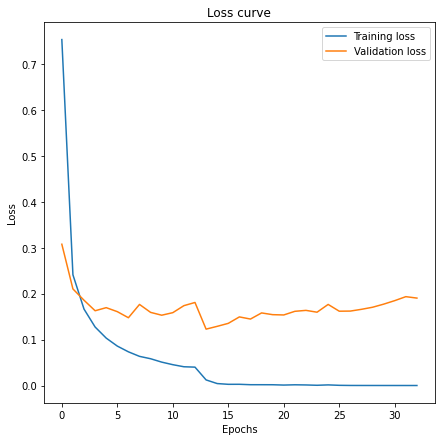

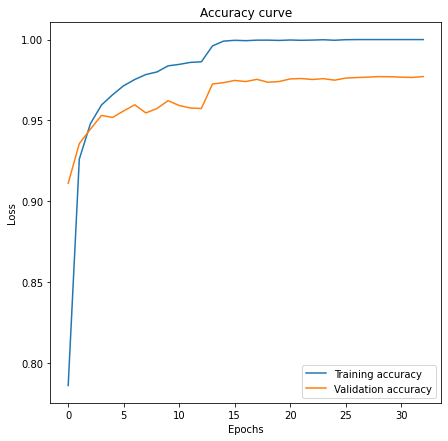

In [ ]:
# Display loss and  accuracy curves
display_loss_accuracy_curves(model_1_history)

In [ ]:
predicted_probability = model_1.predict(testting_dataset , verbose=1)  # predict will return the probability of each class for each image
                                                                       # shape will be (13800,46)

432/432 [==============================] - 1s 2ms/step


In [ ]:
predicted_class = predicted_probability.argmax(axis=1)  # For each image get highest probabality index among the 46 probabilty value of every image

In [ ]:
# Get the actual true label
y_true = []  
for images, labels in testting_dataset.unbatch(): # unbatch the test data and get images and labels
  y_true.append(labels.numpy().argmax())    # Here labels are one hot encoded argmax will return the index having the highest vale 

In [ ]:
# Get the accuracy
accuracy_score(y_true,predicted_class) 

0.9782608695652174

In [ ]:
# This function will provide a bar plot of the f1-score for each class.
def generate_f1_bar_plot(y_true,y_pred):
  '''
  Parameters
  ----------------------
  y_true : The exact class that each image belongs to
  y_pred : The predicted class that each picture belongs to.

  Return
  ----------------------
  Display horizontal bar plot of f1-score of each class

  '''

  clf_report_dict = classification_report(y_true,y_pred , output_dict=True)  # Will return dictionary key as class name and value will again a dictionary having precision,recall
                                                                             # f1-score and support and here we intrested in f1-score
                                                                             # {'0': {'f1-score': 0.24056603773584903,
                                                                              #   'precision': 0.29310344827586204,
                                                                              #   'recall': 0.204,
                                                                              #   'support': 250},
                                                                              #  '1': {'f1-score': 0.5864406779661017,
                                                                              #   'precision': 0.5088235294117647,
                                                                              #   'recall': 0.692,
                                                                              #   'support': 250},......

  # Get f1-score of each class and store in dictionary key as class and values as f1-score
  f1_score={}
  for key , value in clf_report_dict.items():
    if key =='accuracy':
      break
    else:
      f1_score[hindi_character_[int(key)]] = value['f1-score']

  # Convert the f1-score dictionary into dataframe and sort the dataframe by f1-score
  f1_Score=pd.DataFrame(data={'class_names':list(f1_score.keys()),
                   'f1_score':list(f1_score.values())}).sort_values(by='f1_score',ascending=False)
  
  # Plot the horizontal bar plot for f1-score
  fig , ax = plt.subplots(figsize=(15,20))
  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
    
  hindi_font = FontProperties(fname=Path('/content/Nirmala.ttf'))
  f_score = ax.barh(range(len(f1_Score)),f1_Score['f1_score'].values)

  ax.set_yticks(range(len(f1_Score)))
  ax.set_yticklabels(f1_Score['class_names'],fontproperties=hindi_font,fontsize=15)
  ax.set_xlabel("f1-Score",fontsize=15)
  ax.set_ylabel("Class names",fontsize=15)
  ax.set_title("F1-Score for Model 1",fontsize=15)
  ax.invert_yaxis()

  # At the end of every bar show f1-score
  for f1 in f_score:
    width = f1.get_width()
    ax.text(1.03*width , f1.get_y() + f1.get_height()/1.5 , f"{width:.2f}" , ha='center' , va='bottom')

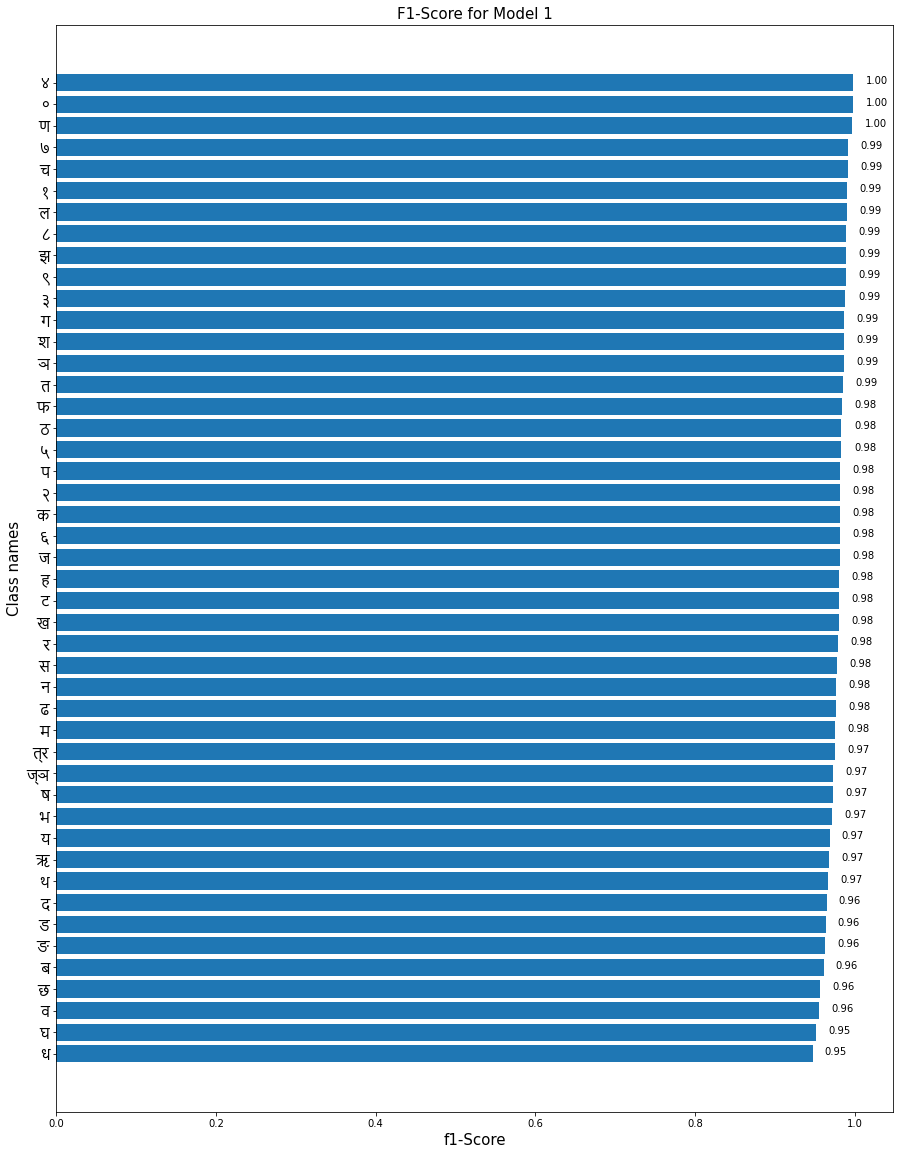

In [ ]:
# Display f1-score of each class for model-1
generate_f1_bar_plot(y_true,predicted_class)

# Model 1 - Error Analysis

## Get the most wrong predictions

In [ ]:
model_1.load_weights(checkpoint_path)  # Load the model 1

In [ ]:
# Get the image path for all of our test data.

test_set = image_dataset_from_directory(directory=testing_directory_path,
                                                image_size=(32,32),
                                                batch_size=32,
                                                label_mode='categorical',
                                                shuffle=False)

image_paths=[] # Store the image path

for img_path in test_set.list_files("/content/DevanagariHandwrittenCharacterDataset/Test/*/*.png",shuffle=False):
  image_paths.append(img_path.numpy())

image_paths[:10] # Display first 10 image path


Found 13800 files belonging to 46 classes.


[b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10544.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/10551.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/121.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/125.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/135.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/13642.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/13656.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/13657.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/13674.png',
 b'/content/DevanagariHandwrittenCharacterDataset/Test/character_10_yna/13680.png']

In [ ]:
predicted_probability = model_1.predict(testting_dataset , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})
df.head()

432/432 [==============================] - 13s 2ms/step


,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
0,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,1.0,ञ,ञ
1,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,1.0,ञ,ञ
2,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,1.0,ञ,ञ
3,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,1.0,ञ,ञ
4,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,1.0,ञ,ञ


In [ ]:
# Get dataframe having wrong predictions and sort the dataframe in ascending order by predictions confidence
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
wrong_df.head()

,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
8119,b'/content/DevanagariHandwrittenCharacterDatas...,27,14,1.0,त्र,ब
9671,b'/content/DevanagariHandwrittenCharacterDatas...,32,12,1.0,च,प
5521,b'/content/DevanagariHandwrittenCharacterDatas...,18,16,1.0,र,म
8495,b'/content/DevanagariHandwrittenCharacterDatas...,28,11,1.0,ज्ञ,न
909,b'/content/DevanagariHandwrittenCharacterDatas...,3,45,1.0,ड,९


In [ ]:
# for row in wrong_df[:5].itertuples():
#   print(row[1],row[4],row[5],row[6])

In [ ]:
# Lets view top 20 wrong prediction
def display_wrong_prediction(data , subplots = (5,4) , figsize = (10,10) , fontsize = 20):
  from pathlib import Path 
  from matplotlib.font_manager import FontProperties
  
  hindi_font = FontProperties(fname=Path('/content/Nirmala.ttf')) 

  plt.figure(figsize=figsize)
  k=1
  for row in data.itertuples():

    plt.subplot(subplots[0],subplots[1],k)
    k=k+1
    img = tf.io.read_file(row[1])
    img = tf.io.decode_image(img)

    plt.imshow(tf.squeeze(img).numpy().astype('uint8'),cmap='gray')
    plt.title(f"Actual Class : {row[5]}\nPredicted Class : {row[6]}\nConfidence : {row[4]*100:.2f}",fontproperties=hindi_font,fontsize=fontsize,color='red')
    plt.axis(False)
  
  plt.show()




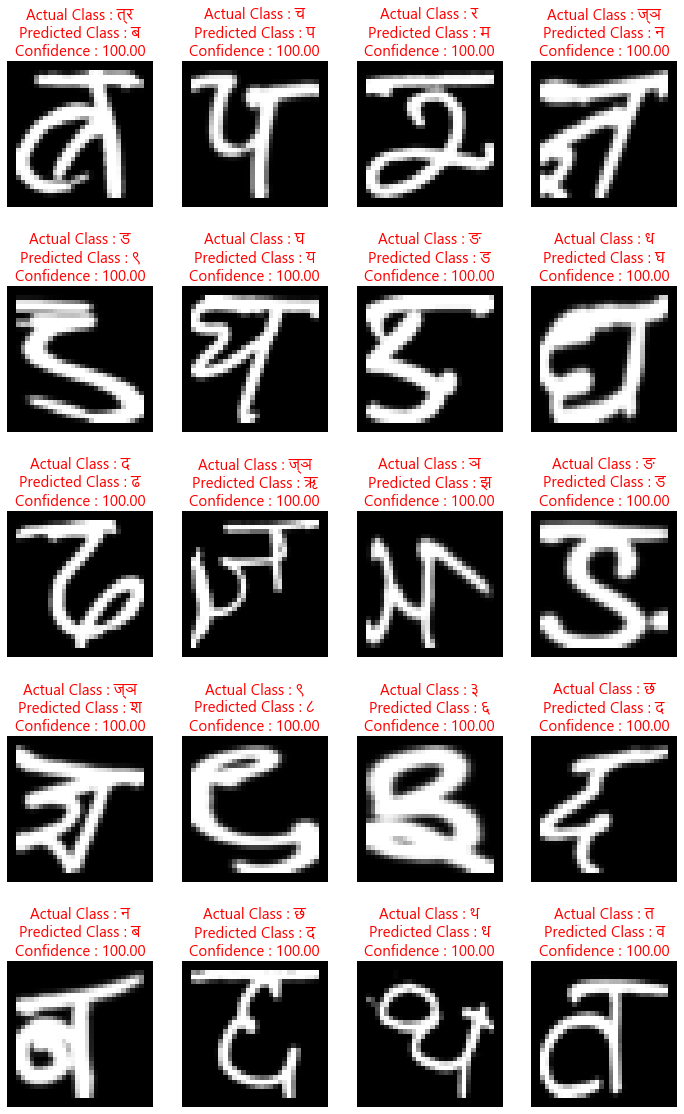

In [ ]:
# Display top 20 wrong predicted images
display_wrong_prediction(data=wrong_df[:20],
                         figsize=(12,20),
                         fontsize=15)

When viewed from above, it is easy to see where the model becomes confused.
As a result of certain character orientations, there are some characters who, while they don't exactly resemble any other characters, they do have some resemblance to those other characters.

# Model 2 : LeNet + BatchNormalization + Dropout
Model 2 is similar model 1, but with additional components like `batch normalization and dropout.`

### Defining Callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_2/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path2 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"LeNet_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path2,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([ # Divide the image array by 255 to normalize it.(Bring the pixel values in the same scale)
  layers.Rescaling(1./255), 
])

model_2 = tf.keras.Sequential([
                rescale,
                # Layer 1
                layers.Conv2D(filters=6 , kernel_size=(5,5) , activation = 'relu' , input_shape = (32,32,3)),
                layers.BatchNormalization(),   
                layers.AveragePooling2D(),
                # Layer 2
                layers.Conv2D(filters=16 , kernel_size=(5,5) , activation = 'relu'),
                layers.BatchNormalization(),
                layers.AveragePooling2D(),

                layers.Flatten(),
                #Fully Connected Layer 1
                layers.Dense(120 , activation = 'relu'),
                layers.BatchNormalization(),
                layers.Dropout(0.3),
                #Fully Connected Layer 2
                layers.Dense(84 , activation = 'relu'),
                #Fully Connected Layer 3
                layers.Dense(len(class_names_) , activation = 'softmax')                
])

In [ ]:
#Compile the model
model_2.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_2_history = model_2.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])               # 18 min 20sec

Epoch 1/50
2077/2077 [==============================] - 45s 20ms/step - loss: 0.8804 - accuracy: 0.7537 - val_loss: 0.2619 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 24s 12ms/step - loss: 0.3244 - accuracy: 0.8980 - val_loss: 0.1942 - val_accuracy: 0.9392 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 25s 12ms/step - loss: 0.2425 - accuracy: 0.9231 - val_loss: 0.1671 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 24s 12ms/step - loss: 0.2066 - accuracy: 0.9342 - val_loss: 0.1592 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 24s 12ms/step - loss: 0.1844 - accuracy: 0.9420 - val_loss: 0.1163 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 24s 12ms/step - loss: 0.1607 - accuracy: 0.9484 - val_loss: 0.1208 - val_accuracy: 0.9616 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_2_results = model_2.evaluate(testting_dataset)
model_2_results

432/432 [==============================] - 2s 4ms/step - loss: 0.0581 - accuracy: 0.9838


[0.05812986195087433, 0.983768105506897]

We attain an accuracy of `98.3% ` using **model 2**, which is `1%` better than **model 1.**

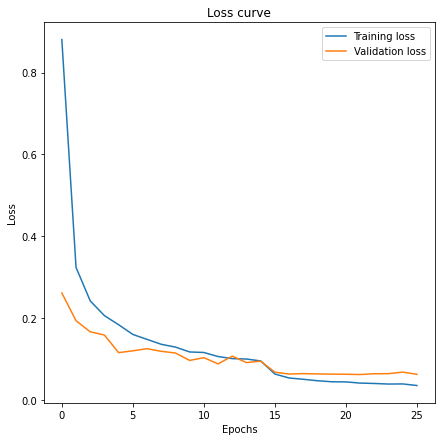

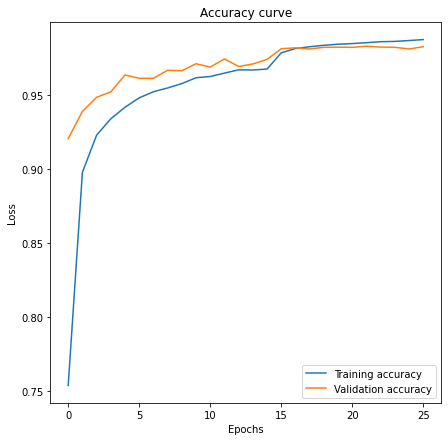

In [ ]:
# Dsiplay the loss and accuracy curves 
display_loss_accuracy_curves(model_2_history)

In [ ]:
predicted_probability = model_2.predict(testting_dataset)

In [ ]:
predicted_class = predicted_probability.argmax(axis=1)

In [ ]:
accuracy_score(y_true,predicted_class)

0.983768115942029

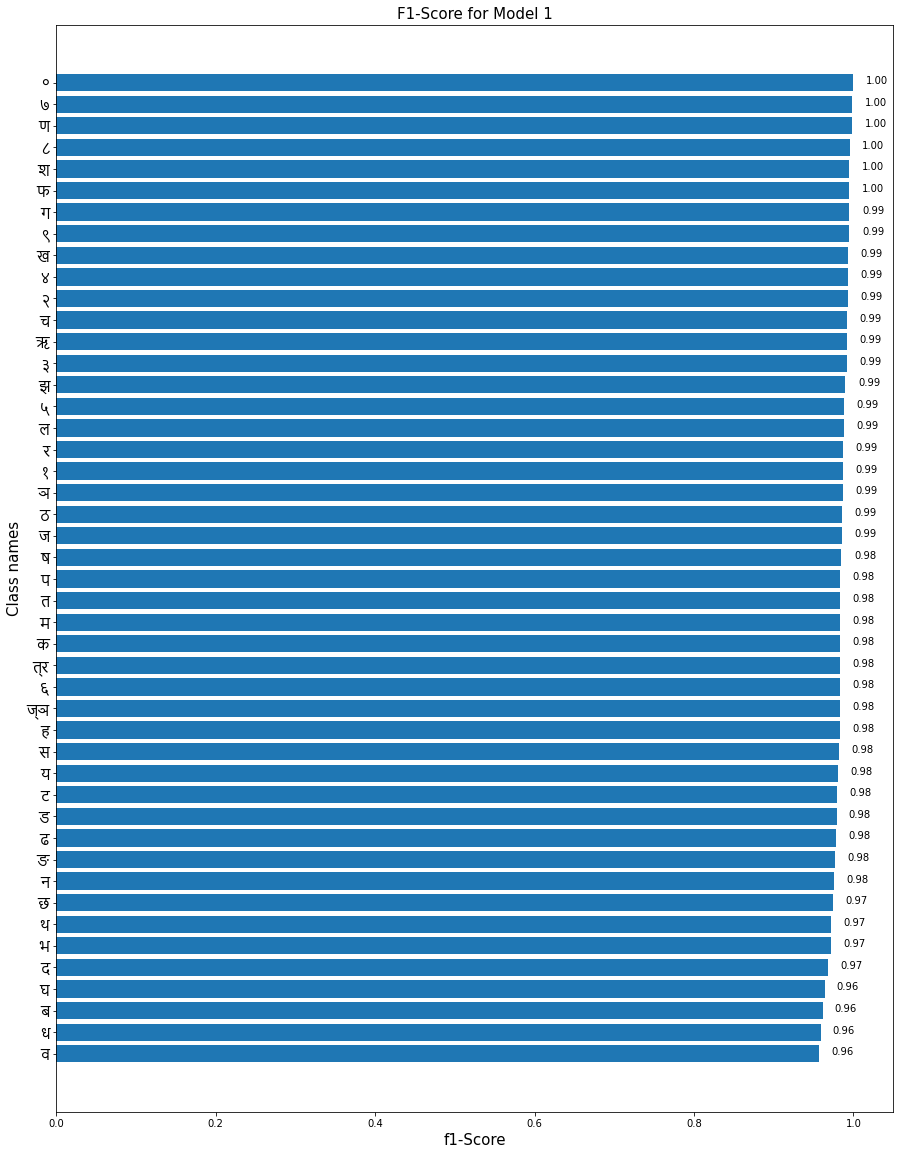

In [ ]:
generate_f1_bar_plot(y_true,predicted_class)

# Model 2 - Error Analysis

## Get the most wrong prediction

In [ ]:
model_2.load_weights(checkpoint_path2)  # Load the model 2

In [ ]:
predicted_probability = model_2.predict(testting_dataset , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})
df.head()

432/432 [==============================] - 1s 2ms/step


,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
0,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,0.999996,ञ,ञ
1,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,0.999990,ञ,ञ
2,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,0.999987,ञ,ञ
3,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,0.999834,ञ,ञ
4,b'/content/DevanagariHandwrittenCharacterDatas...,0,0,0.998748,ञ,ञ


In [ ]:
# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
wrong_df.head()

,image_paths,y_true,y_pred,prediction_confidence,Actual_class,Predicted_class
3577,b'/content/DevanagariHandwrittenCharacterDatas...,11,6,0.999992,न,त
9671,b'/content/DevanagariHandwrittenCharacterDatas...,32,12,0.999976,च,प
6016,b'/content/DevanagariHandwrittenCharacterDatas...,20,6,0.999875,व,त
93,b'/content/DevanagariHandwrittenCharacterDatas...,0,34,0.999802,ञ,ज
6027,b'/content/DevanagariHandwrittenCharacterDatas...,20,14,0.999732,व,ब


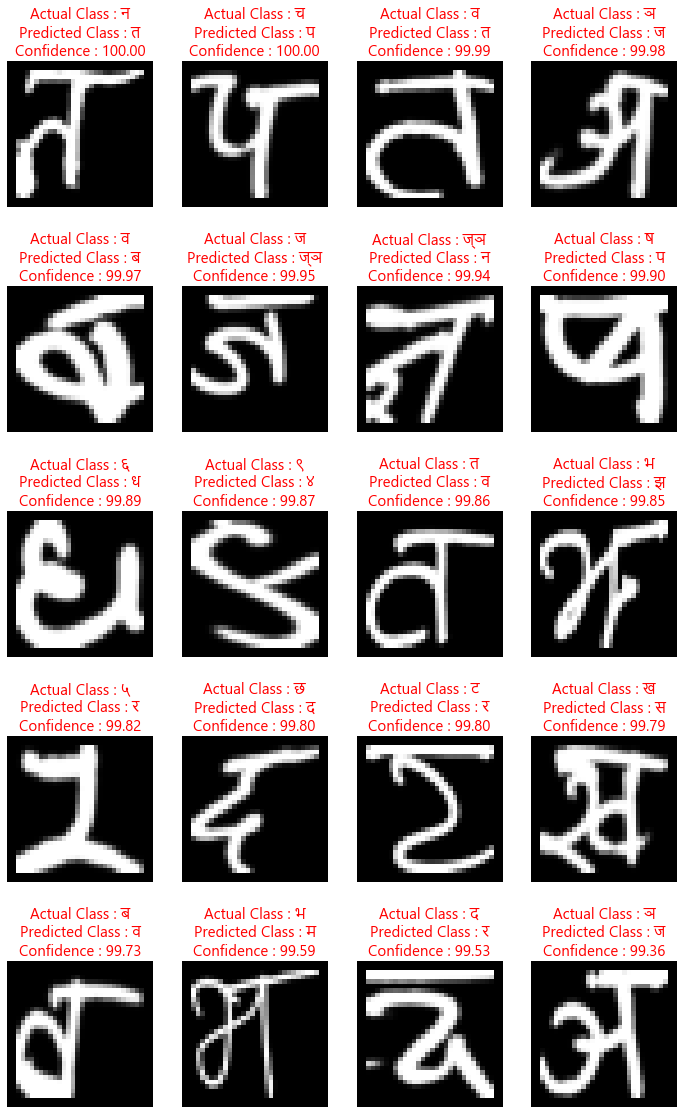

In [ ]:
display_wrong_prediction(data=wrong_df[:20],
                         figsize=(12,20),
                         fontsize=15)

# Model 3: VGG
The VGG architecture serves as a significant source of inspiration for Model 3.

### Defining Callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_3/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path3 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"VGG_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path3,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([   # Normalizing the image
  layers.Rescaling(1./255),
])

In [ ]:
model_3 = tf.keras.Sequential([
                    rescale,
                    # Layer 1
                    layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu' , input_shape=(32,32,3)),  # input shape (height, width, colour channels)
                    layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'),
                    layers.MaxPool2D(pool_size=(2,2)),
                    # Layer 2
                    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
                    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
                    layers.MaxPool2D(pool_size=(2,2)),

                    layers.Flatten(),
                    # Fully Connected Layer 1
                    layers.Dense(128, activation='relu'),
                    # Fully Connected Layer 1
                    layers.Dense(len(class_names_),activation='softmax')  # activation = softmax for mult-class classification
])


In [ ]:
model_3.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
model_3_history = model_3.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])             

Epoch 1/50
2077/2077 [==============================] - 41s 19ms/step - loss: 0.4612 - accuracy: 0.8683 - val_loss: 0.1736 - val_accuracy: 0.9463 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 43s 21ms/step - loss: 0.1070 - accuracy: 0.9672 - val_loss: 0.1083 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 43s 20ms/step - loss: 0.0646 - accuracy: 0.9793 - val_loss: 0.0987 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 43s 21ms/step - loss: 0.0469 - accuracy: 0.9848 - val_loss: 0.1184 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 40s 19ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.0887 - val_accuracy: 0.9765 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 35s 17ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.1061 - val_accuracy: 0.9747 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_3_results = model_3.evaluate(testting_dataset)
model_3_results

432/432 [==============================] - 2s 5ms/step - loss: 0.1021 - accuracy: 0.9875


[0.10206163674592972, 0.9875362515449524]

The accuracy of **model 3** is slightly better to that of model 2.

The accuracy of Model 2 is **`98.3%`**, whereas Model 3 is **`98.7%.`**

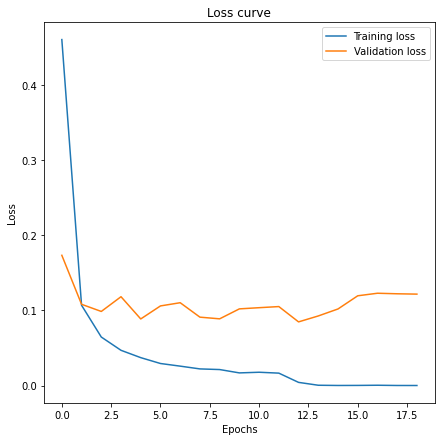

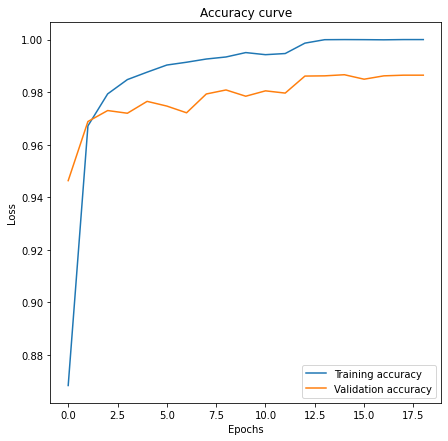

In [ ]:
display_loss_accuracy_curves(model_3_history)

In [ ]:
predicted_probability = model_3.predict(testting_dataset)

In [ ]:
predicted_class = predicted_probability.argmax(axis=1)

In [ ]:
accuracy_score(y_true,predicted_class)

0.9875362318840579

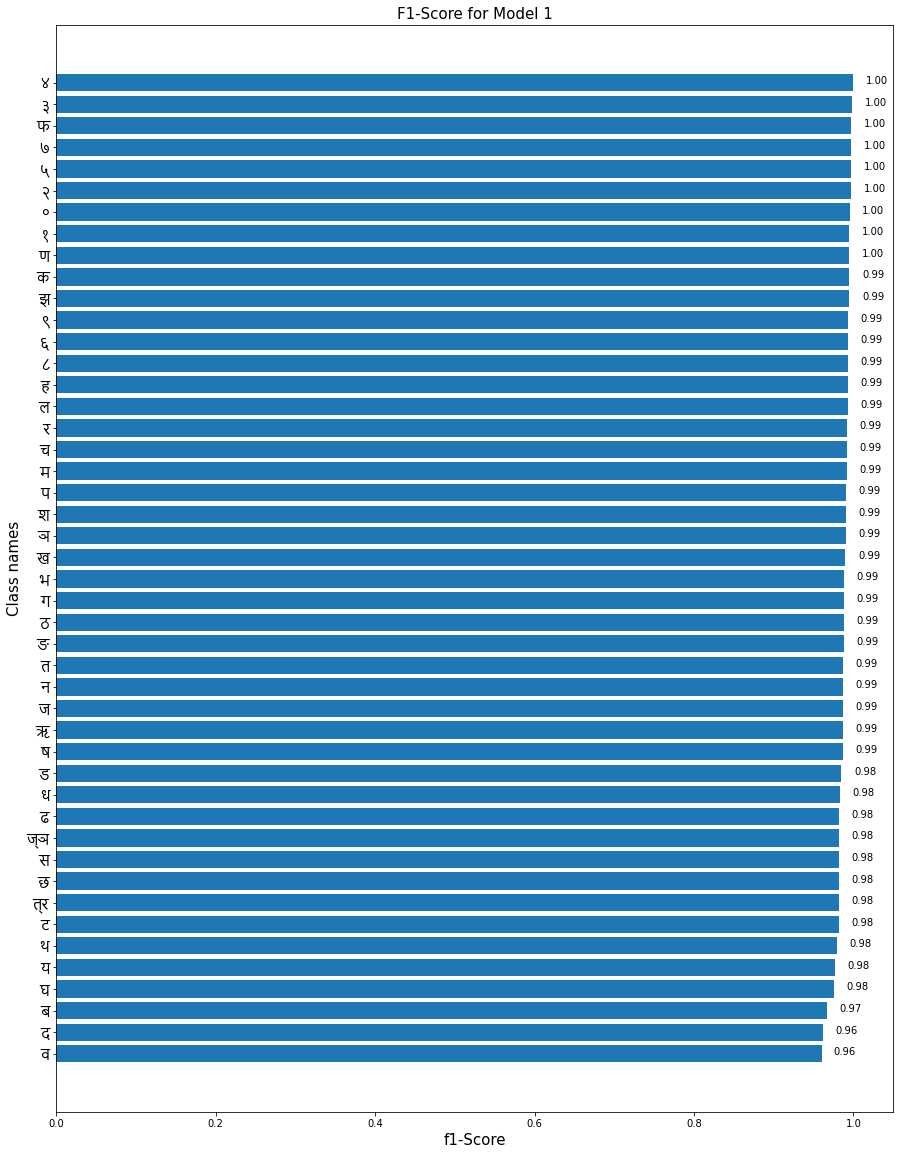

In [ ]:
generate_f1_bar_plot(y_true,predicted_class)

# Model 3 - Error analysis


## Get the most wrong predictions

432/432 [==============================] - 2s 2ms/step


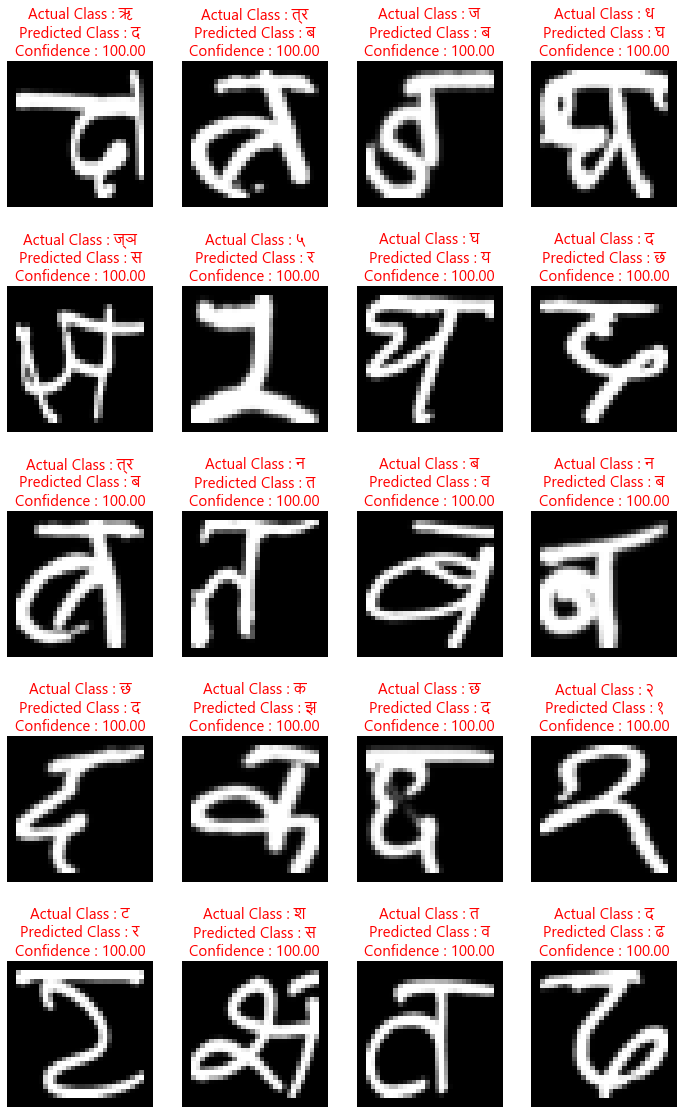

In [ ]:
model_3.load_weights(checkpoint_path3)  # Load the model 3

predicted_probability = model_3.predict(testting_dataset , verbose=1)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
wrong_df.head()

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:20],
                         figsize=(12,20),
                         fontsize=15)

The above image helps us see exactly where and why the model is having trouble.

# Model 4 : VGG + BatchNormalization + Dropout
Model 4 is similar model 3, but with additional components like `batch normalization and dropout.`

### Defining Callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_4/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path4 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"VGG_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path4,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([    # Normalize the image array
  layers.Rescaling(1./255),
])

model_4 = tf.keras.Sequential([
                    rescale,
                    
                    # Layers 1 + Batchnormalization
                    layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu' , input_shape=(32,32,3)),  # input shape (height, width, colour channels)
                    layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2,2)),
                    # Layers 2 + Batchnormalization
                    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
                    layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu'),
                    layers.BatchNormalization(),
                    layers.MaxPool2D(pool_size=(2,2)),

                    layers.Flatten(),
                    # Fully connected layers 1 + Dropout
                    layers.Dropout(0.3),
                    layers.Dense(128, activation='relu'),
                    # Fully connected layers 2 + Dropout
                    layers.Dropout(0.3),
                    layers.Dense(len(class_names_),activation='softmax')  
])

In [ ]:
# Compile the model
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_4_history = model_4.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])             

Epoch 1/50
2077/2077 [==============================] - 34s 16ms/step - loss: 0.7415 - accuracy: 0.7879 - val_loss: 0.1783 - val_accuracy: 0.9478 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 32s 15ms/step - loss: 0.2416 - accuracy: 0.9280 - val_loss: 0.0966 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 33s 16ms/step - loss: 0.1709 - accuracy: 0.9475 - val_loss: 0.1052 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 32s 15ms/step - loss: 0.1402 - accuracy: 0.9574 - val_loss: 0.0713 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 30s 14ms/step - loss: 0.1205 - accuracy: 0.9622 - val_loss: 0.0690 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 31s 15ms/step - loss: 0.1057 - accuracy: 0.9667 - val_loss: 0.0708 - val_accuracy: 0.9801 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_4_results = model_4.evaluate(testting_dataset)
model_4_results

432/432 [==============================] - 2s 5ms/step - loss: 0.0324 - accuracy: 0.9928


[0.03241553157567978, 0.9928261041641235]

We achieve an accuracy of **`99.28%`** with **model 4**, which is somewhat higher than what we achieve with **model 3**, which is `98.75%`.

There have been some improvements made thanks to `batch-normalization and dropout technique`.

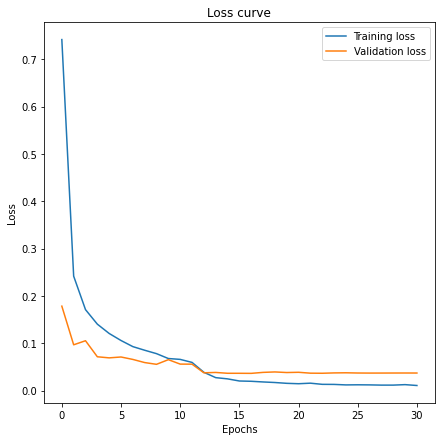

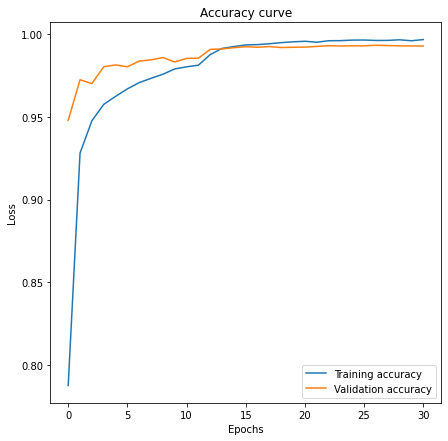

In [ ]:
# Plot loss and accuracy curves
display_loss_accuracy_curves(model_4_history)

In [ ]:
predicted_probability = model_4.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

In [ ]:
accuracy_score(y_true,predicted_class)

0.9928260869565217

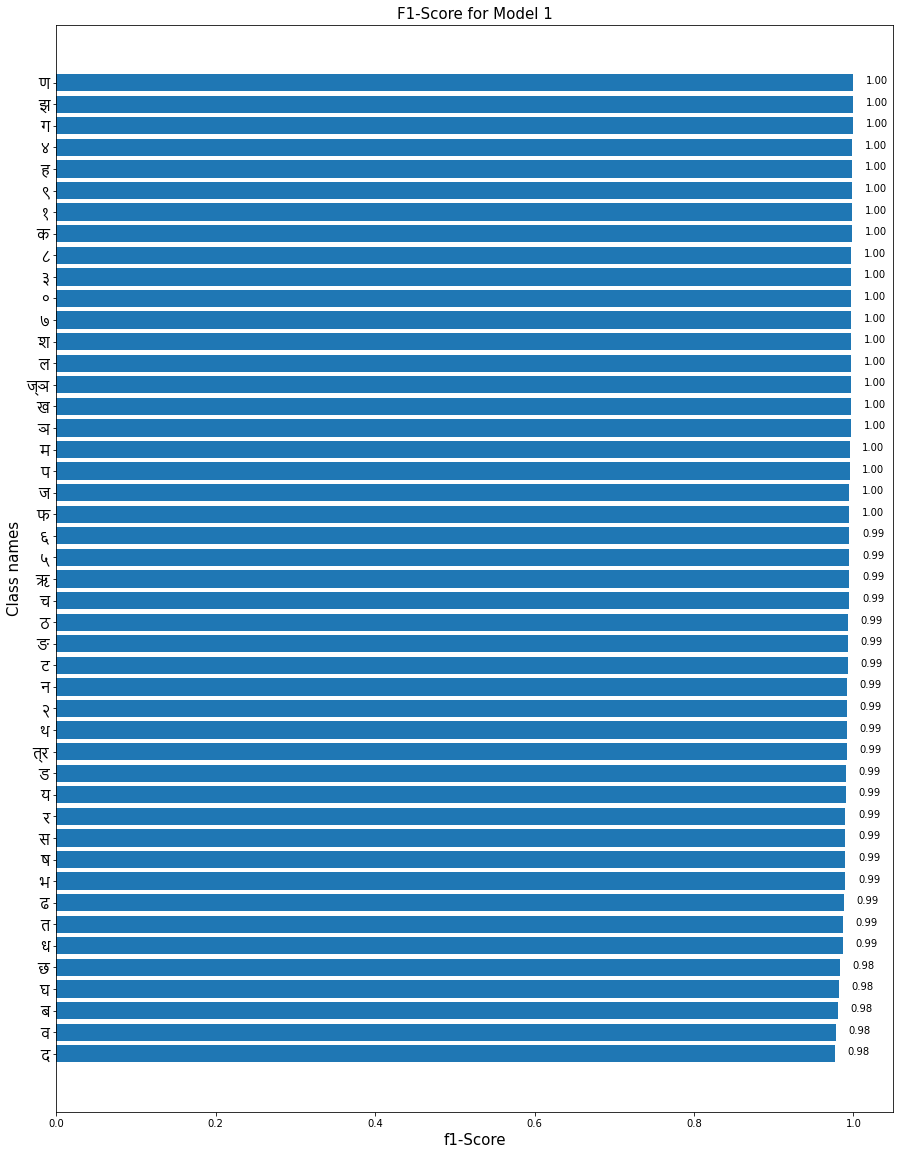

In [ ]:
# Plot f1-score of each class for model 4
generate_f1_bar_plot(y_true,predicted_class)

# Model 4 - Error Analysis

## Get the most wrong predeictions

We have only 98 images that did not match our predictions, out of a total of 13800 images 
Among those 98 images some of them are displayed below




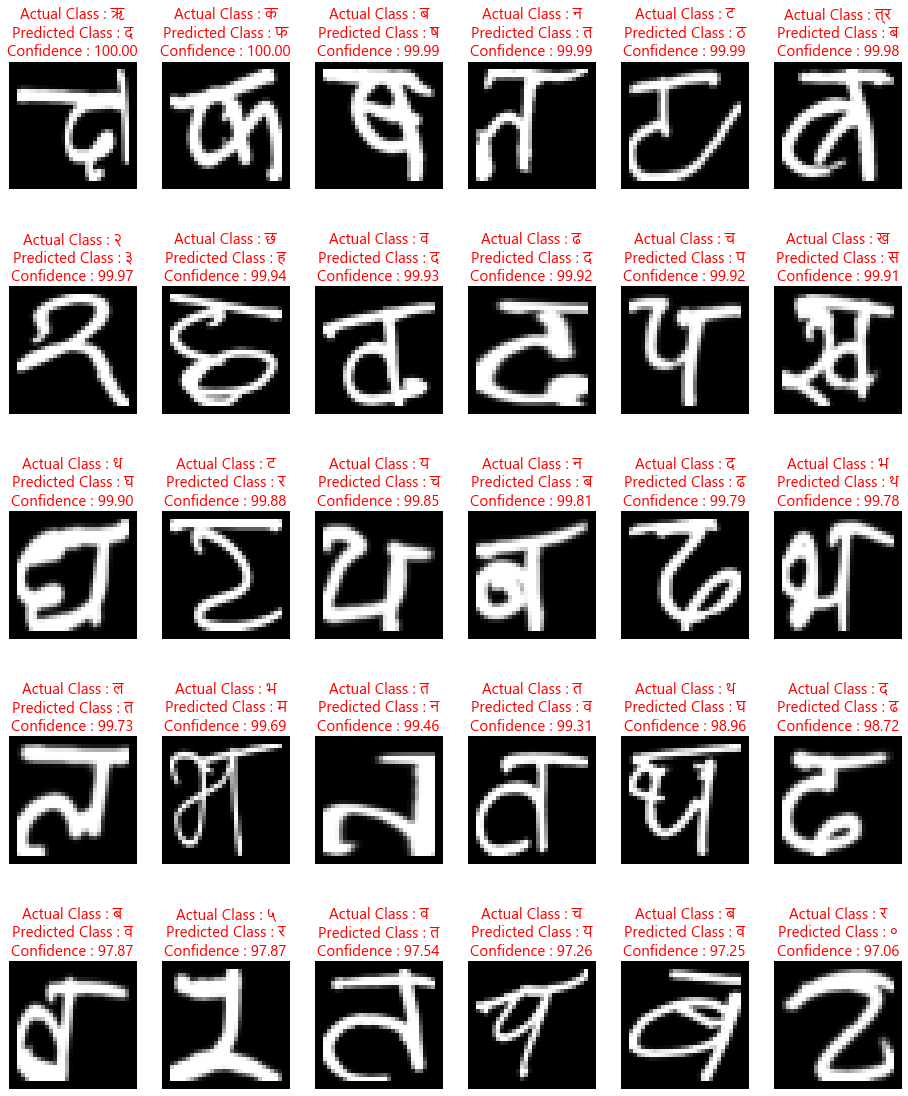

In [ ]:
model_4.load_weights(checkpoint_path4)  # Load the model 4

predicted_probability = model_4.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 5 : ResNet

The Residual network architecture serves as an inspiration for Model 5.

### Defining Callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_5/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path5 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"ResNet_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path5,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([   # Normalization of data
  layers.Rescaling(1./255),
])

input = layers.Input(shape=(32,32,3))   # Input of data
x = rescale(input)                      # Rescale the data

# Layer 1
x = layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
output_1 = layers.MaxPooling2D(pool_size=(2,2))(x)

# Layer 2
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(output_1)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(x)
# Skip connection
output_2 = layers.add([x,output_1])

# Layer 3
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(output_2)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(x)
# Skip connection
output_3 = layers.add([x,output_2])

x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu')(output_3)
x = layers.GlobalAveragePooling2D()(x)

# Fully connected layer 1
output = layers.Dense(len(class_names_) , activation='softmax')(x)

model_5 = tf.keras.Model(input , output)

In [ ]:
# Compile the model
model_5.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_5_history = model_5.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])             

Epoch 1/50
2077/2077 [==============================] - 36s 16ms/step - loss: 1.1668 - accuracy: 0.6646 - val_loss: 0.1941 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 28s 13ms/step - loss: 0.1621 - accuracy: 0.9510 - val_loss: 0.1207 - val_accuracy: 0.9658 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 27s 13ms/step - loss: 0.1015 - accuracy: 0.9690 - val_loss: 0.0732 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 28s 13ms/step - loss: 0.0765 - accuracy: 0.9770 - val_loss: 0.0652 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 27s 13ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0674 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 28s 13ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0650 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_5_results = model_5.evaluate(testting_dataset)
model_5_results

432/432 [==============================] - 3s 6ms/step - loss: 0.0603 - accuracy: 0.9929


[0.06032045558094978, 0.9928985238075256]

We are able to get an accuracy of **`99.28%`** with **model 5**, which is almost the same as what we were able to achieve with model 4 (VGG+BatchNormalization+Dropout).

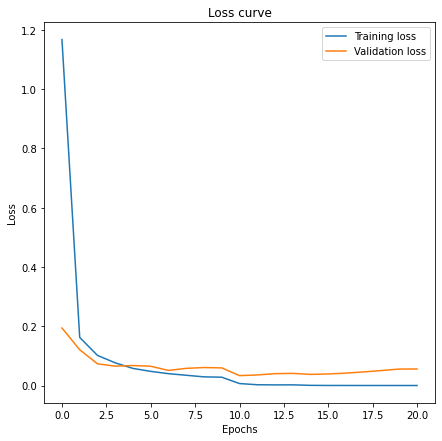

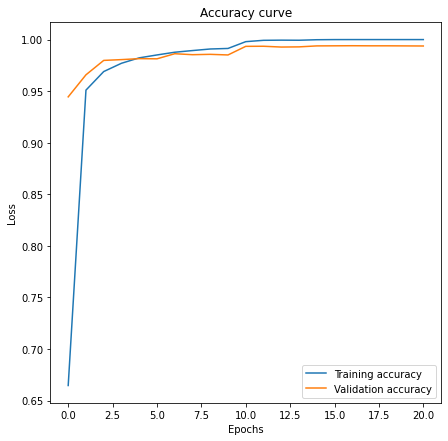

In [ ]:
# Display loss and accuracy curves for model 5
display_loss_accuracy_curves(model_5_history)

In [ ]:
predicted_probability = model_5.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

In [ ]:
accuracy_score(y_true,predicted_class)

0.9928985507246377

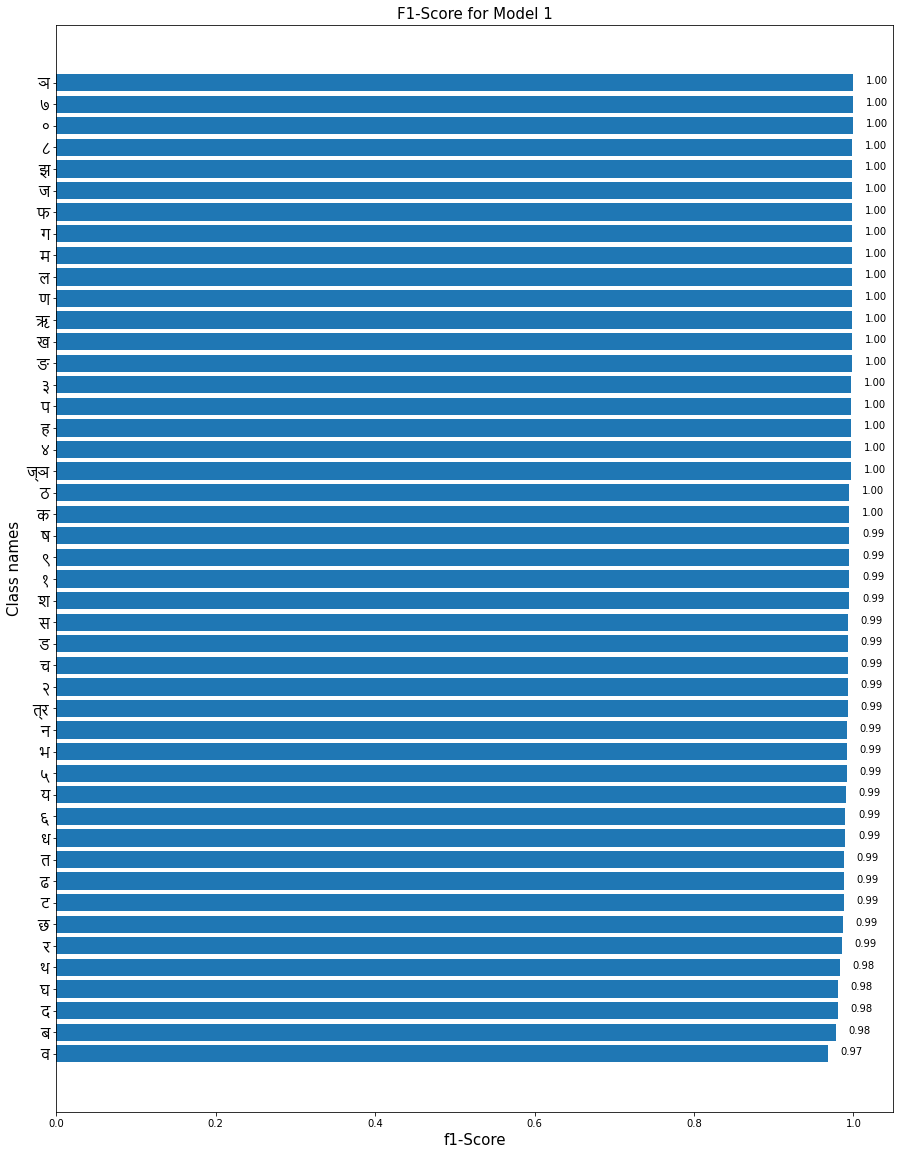

In [ ]:
generate_f1_bar_plot(y_true,predicted_class)

# Model 5 - Error Analysis

## Get the most wrong predictions

We have only 100 images that did not match our predictions, out of a total of 13800 images 
Among those 100 images some of them are displayed below




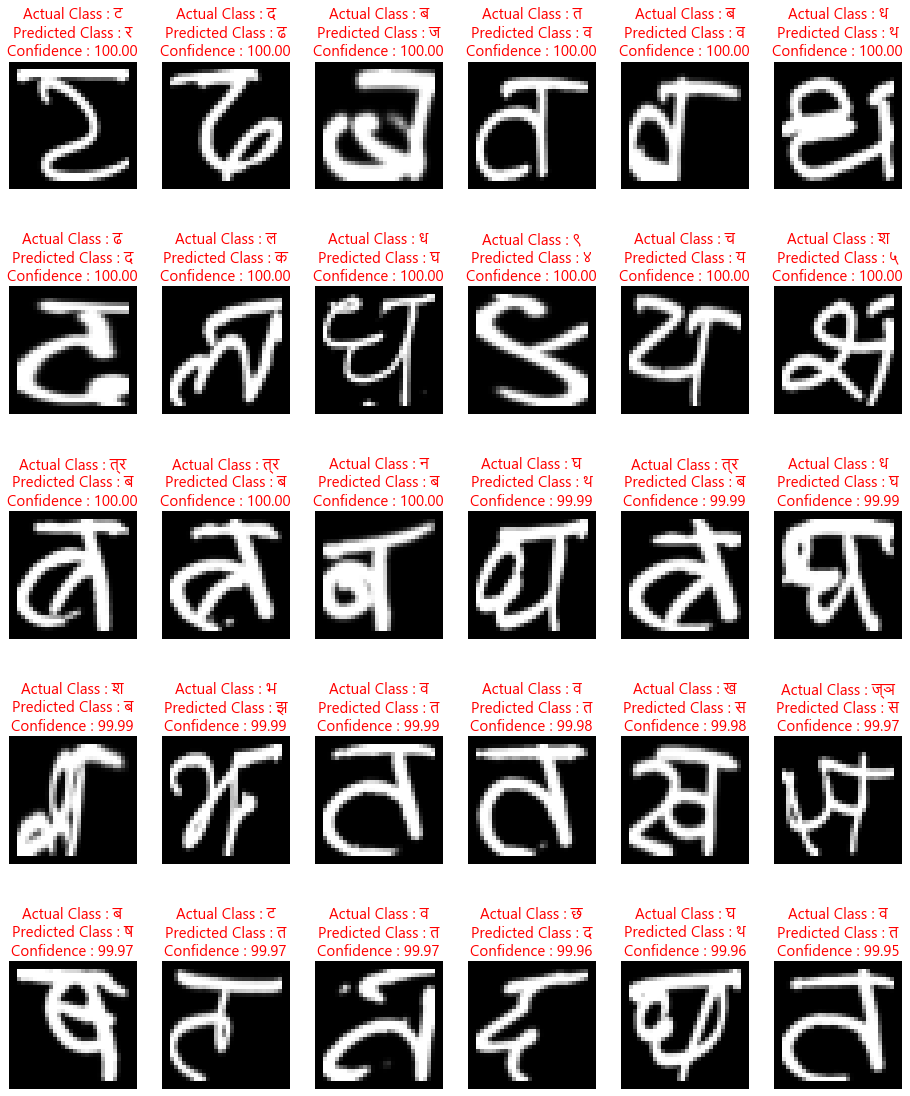

In [ ]:
model_5.load_weights(checkpoint_path5)  # Load the model 5

predicted_probability = model_5.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 6 : ResNet + BatchNormalization Dropout

Model 6 is similar model 5, but with additional components like `batch normalization and dropout.`

### Defining Callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_6/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path6 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"ResNet_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path6,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([  # Data Normalization
  layers.Rescaling(1./255),
])

input = layers.Input(shape=(32,32,3))  # Input to the model
x = rescale(input)                     # Rescaling the input

# Layer 1 + BatchNormalization
x = layers.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu')(x)
x = layers.BatchNormalization()(x)
output_1 = layers.MaxPooling2D(pool_size=(2,2))(x)

# Layer 2 + BatchNormalization
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(output_1)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(x)
x = layers.BatchNormalization()(x)
# Skip Connection
output_2 = layers.add([x,output_1])

# Layer 3 + BatchNormalization
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(output_2)
x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu' , padding='same')(x)
x = layers.BatchNormalization()(x)
# Skip Connection
output_3 = layers.add([x,output_2])

x = layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),activation='relu')(output_3)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)

# Fully connected layer 1
output = layers.Dense(len(class_names_) , activation='softmax')(x)

model_6 = tf.keras.Model(input , output)

In [ ]:
# Compile the model
model_6.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Fit the model
model_6_history = model_6.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])      # 13m : 4s       

Epoch 1/50
2077/2077 [==============================] - 62s 23ms/step - loss: 0.6413 - accuracy: 0.8162 - val_loss: 0.1806 - val_accuracy: 0.9424 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 31s 15ms/step - loss: 0.1362 - accuracy: 0.9587 - val_loss: 0.2244 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 30s 14ms/step - loss: 0.0931 - accuracy: 0.9719 - val_loss: 0.0925 - val_accuracy: 0.9735 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 29s 14ms/step - loss: 0.0721 - accuracy: 0.9788 - val_loss: 0.0568 - val_accuracy: 0.9850 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 29s 14ms/step - loss: 0.0592 - accuracy: 0.9825 - val_loss: 0.0756 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 30s 14ms/step - loss: 0.0503 - accuracy: 0.9852 - val_loss: 0.0609 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_6_results = model_6.evaluate(testting_dataset)
model_6_results

432/432 [==============================] - 2s 5ms/step - loss: 0.0223 - accuracy: 0.9956


[0.022279592230916023, 0.995579719543457]

**Model-6** achieves an accuracy of **`99.55%`**, which is the highest accuracy we have obtained with any of the other models we have developed, this is an excellent model.

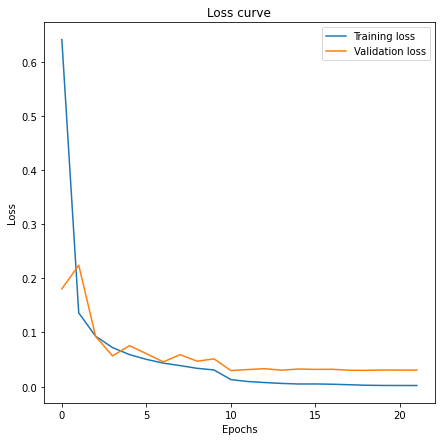

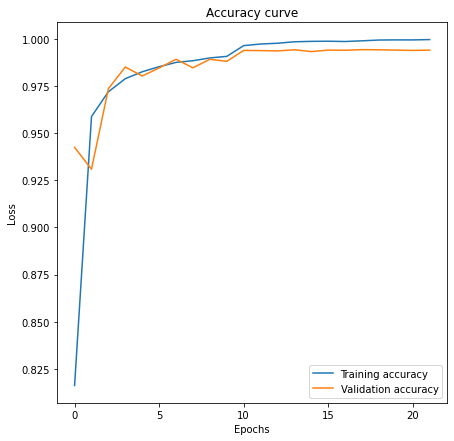

In [ ]:
# Display loss and accuracy curves for model 6
display_loss_accuracy_curves(model_6_history)

In [ ]:
predicted_probability = model_6.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

In [ ]:
accuracy_score(y_true,predicted_class)

0.9955797101449275

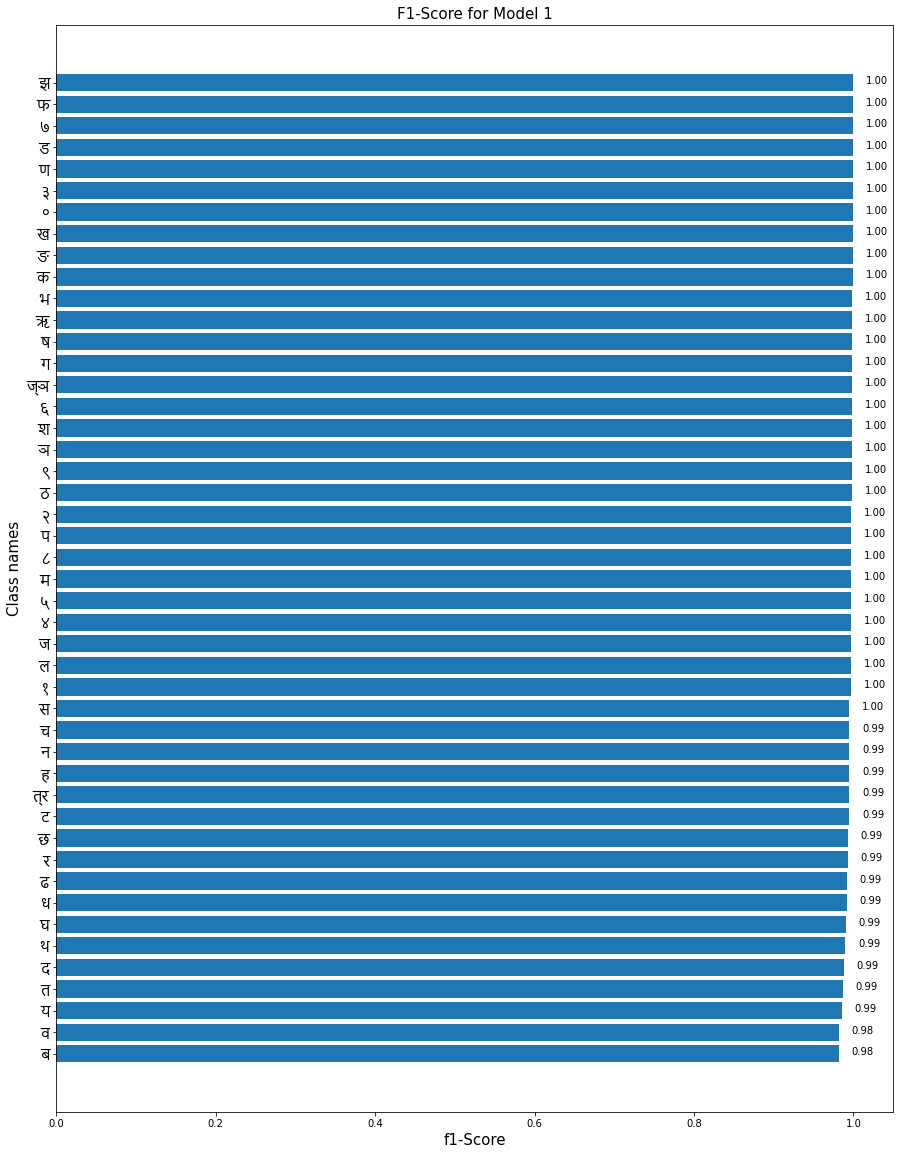

In [ ]:
generate_f1_bar_plot(y_true,predicted_class)

# Model 6 - Error Analysis

## Get the most wrong predictions

We have only 69 images that did not match our predictions, out of a total of 13800 images 
Among those 69 images some of them are displayed below




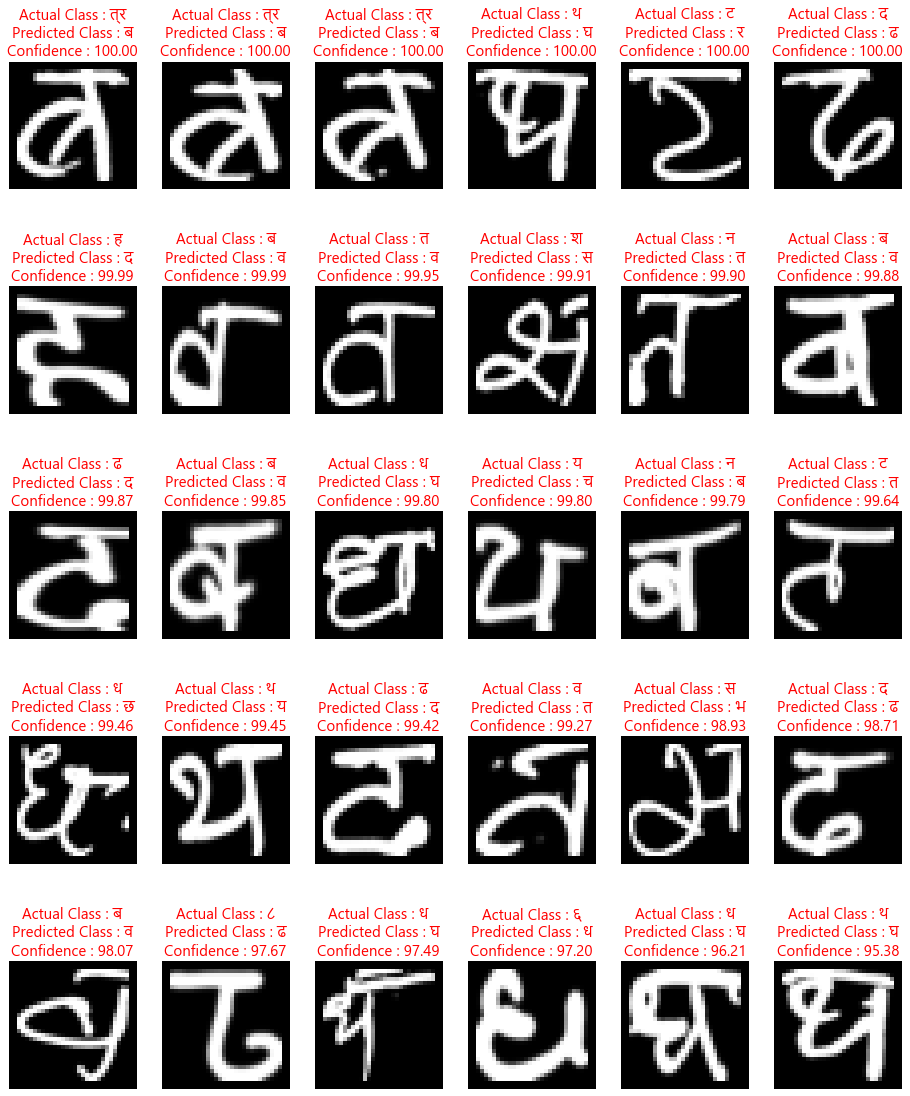

In [ ]:
model_6.load_weights(checkpoint_path6)  # Load the model 6

predicted_probability = model_6.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 7 :

### Defining callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_7/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path7 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"Model_7_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path7,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
rescale = tf.keras.Sequential([     # Data Normalization
  layers.Rescaling(1./255),
])

model_7 = tf.keras.Sequential([
            rescale,
            # Layers 1 + BatchNormalization
            layers.Conv2D(filters=32 , kernel_size=2 , padding='same' , activation='relu' , input_shape=(32,32,3)),
            layers.BatchNormalization(),
            layers.MaxPool2D(),
            # Layers 2 + BatchNormalization
            layers.Conv2D(filters=64 , kernel_size=2 , padding='same' , activation='relu' ),
            layers.BatchNormalization(),
            layers.MaxPool2D(),
            # Layers 3 + BatchNormalization
            layers.Conv2D(filters=128 , kernel_size=2 , padding='same' , activation='relu' ),
            layers.BatchNormalization(),
            layers.MaxPool2D(),

            layers.Flatten(),
            # Fully connected layer 1
            layers.Dense(units=512 , activation='relu'),
            layers.Dropout(0.3),
            # Fully connected layer 2 + Dropout
            layers.Dense(units=256 , activation='relu'),
            layers.Dropout(0.3),
            # Fully connected layer 3 + Dropout
            layers.Dense(len(class_names_) , activation='softmax')
])

# Compile the model 
model_7.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

# Fit the model 
model_7_history = model_7.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])             

In [ ]:
model_7_results = model_7.evaluate(testting_dataset)
model_7_results

432/432 [==============================] - 2s 4ms/step - loss: 0.0625 - accuracy: 0.9907


[0.0625397190451622, 0.9907246232032776]

We have achieved an accuracy of **`99.07%`** with the **model 7**.

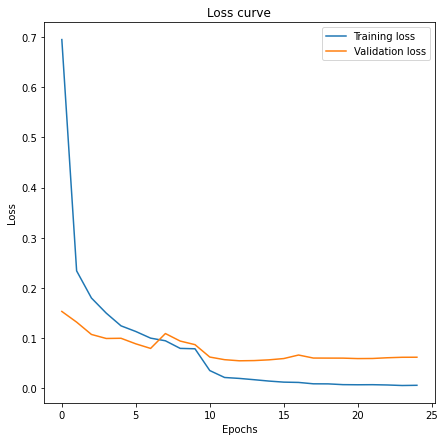

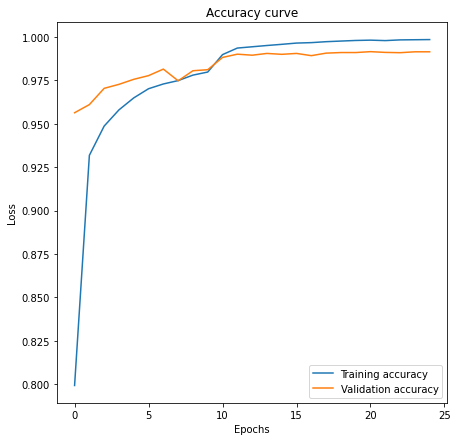

In [ ]:
# Display loss and accuracy curves for model 7
display_loss_accuracy_curves(model_7_history)

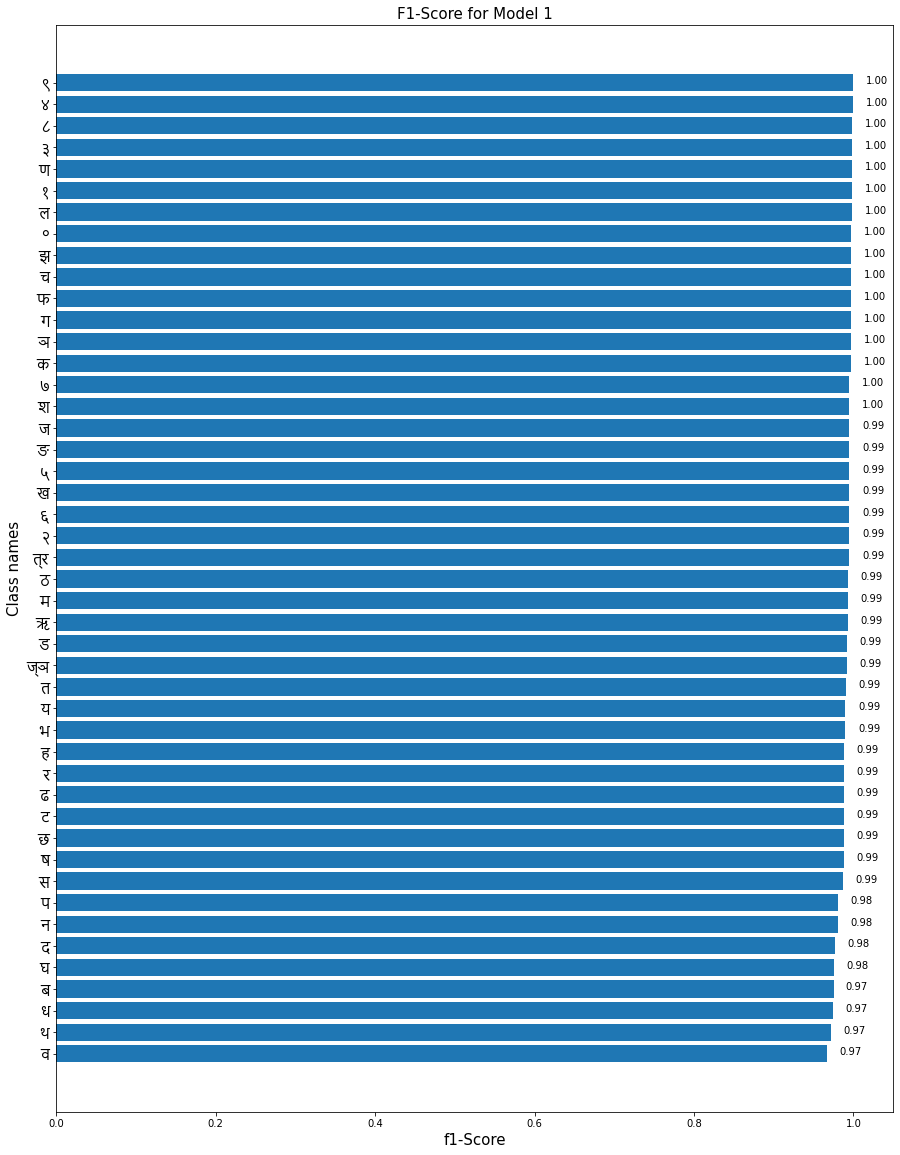

In [ ]:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------# Plot f1-score of each class for model 7
predicted_probability = model_7.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)
generate_f1_bar_plot(y_true,predicted_class)

# Model 7 - Error Analysis

## Get the most wrong predictions

We have only 130 images that did not match our predictions, out of a total of 13800 images 
Among those 130 images some of them are displayed below




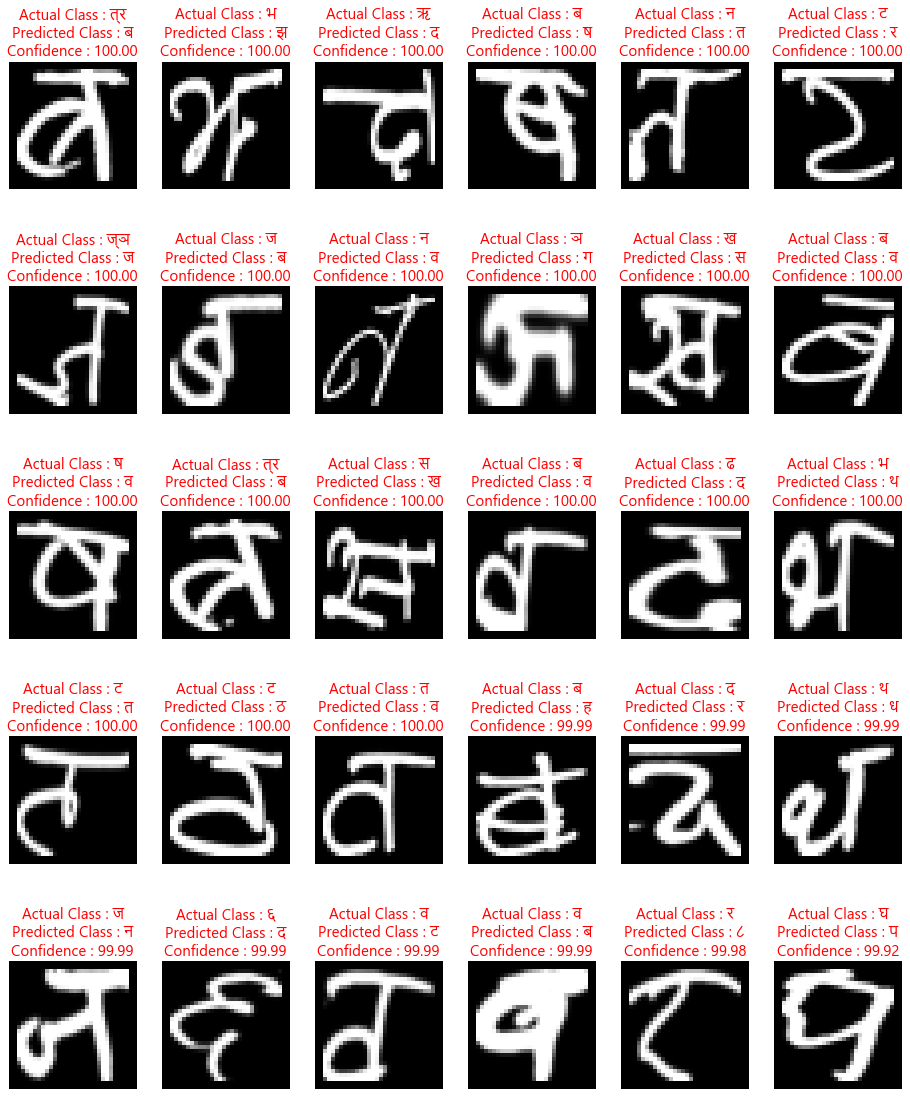

In [ ]:
model_7.load_weights(checkpoint_path7)  # Load the model 7

predicted_probability = model_7.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 8 :

## Defining callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_8/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path8 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"Model_8_Batch_Drop_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path8,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
model_8 = tf.keras.Sequential([
            rescale,            # Rescale the data
            #Layer 1 + BatchNormalization
            layers.Conv2D(32 , 3 , activation='relu' , input_shape=(32,32,3)),
            layers.BatchNormalization(),
            layers.MaxPool2D(padding='same'),
            #Layer 2 + BatchNormalization
            layers.Conv2D(32 , 3 , activation='relu' ),
            layers.BatchNormalization(),
            layers.MaxPool2D(padding='same'),
            #Layer 3 + BatchNormalization
            layers.Conv2D(64 , 3 , activation='relu' ),
            layers.BatchNormalization(),
            layers.MaxPool2D(padding='same'),
            #Layer 4 + BatchNormalization
            layers.Conv2D(64 , 3 , activation='relu' ),
            layers.BatchNormalization(),
            layers.MaxPool2D(padding='same'),

            layers.Flatten(),

            #Fully connected layer 1 + BatchNormalization
            layers.Dense(128,activation='relu'),
            layers.BatchNormalization(),
            #Fully connected layer 2 + BatchNormalization
            layers.Dense(64,activation='relu'),
            layers.BatchNormalization(),
            layers.Dense(len(class_names) , activation='softmax')
])

# Compile the model
model_8.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

# Fit the model
model_8_history = model_8.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])   

In [ ]:
model_8_results = model_8.evaluate(testting_dataset)
model_8_results

432/432 [==============================] - 2s 5ms/step - loss: 0.0428 - accuracy: 0.9896


[0.0428229384124279, 0.9895651936531067]

With the help of **model 8**, we able to achieve an accuracy of **`98.95%`**, which is not poor.

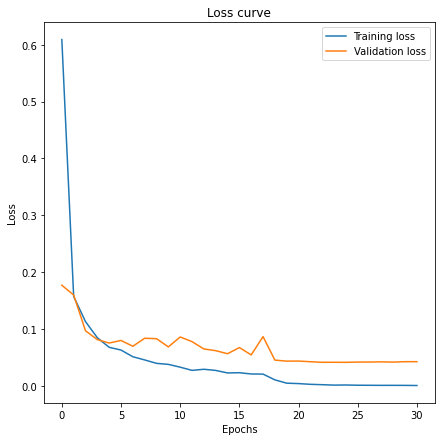

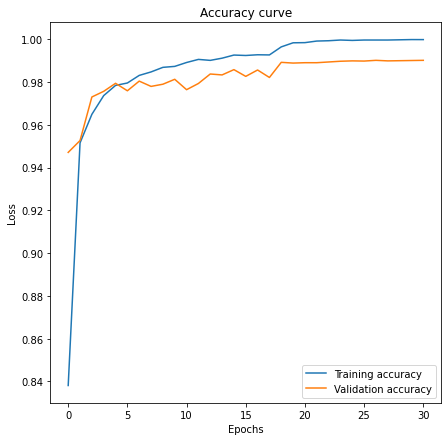

In [ ]:
# Display loss and accuracy curves for model 8
display_loss_accuracy_curves(model_8_history)

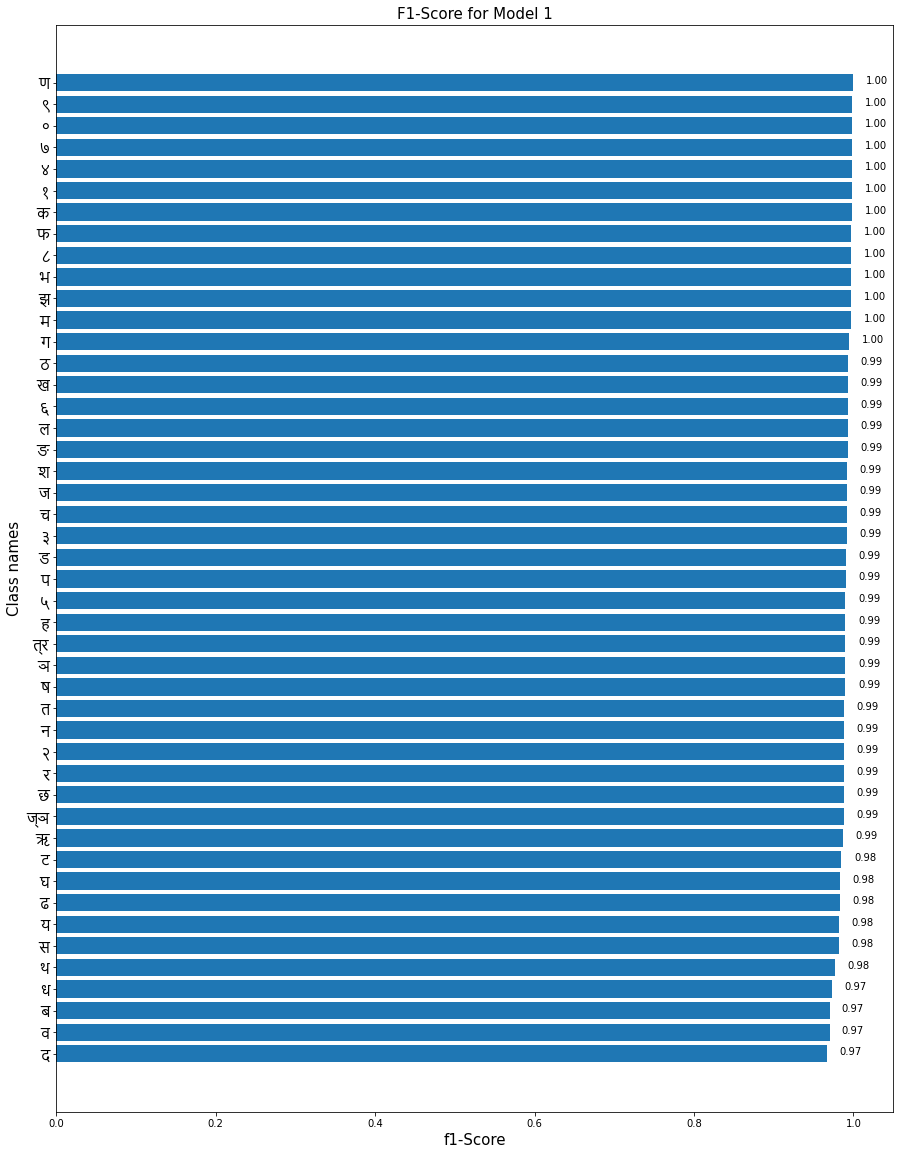

In [ ]:
# Plot the f1-score of each class for model 8
predicted_probability = model_8.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)
generate_f1_bar_plot(y_true,predicted_class)

# Model 8 - Error Analysis

## Get the most wrong predictions

We have only 145 images that did not match our predictions, out of a total of 13800 images 
Among those 145 images some of them are displayed below




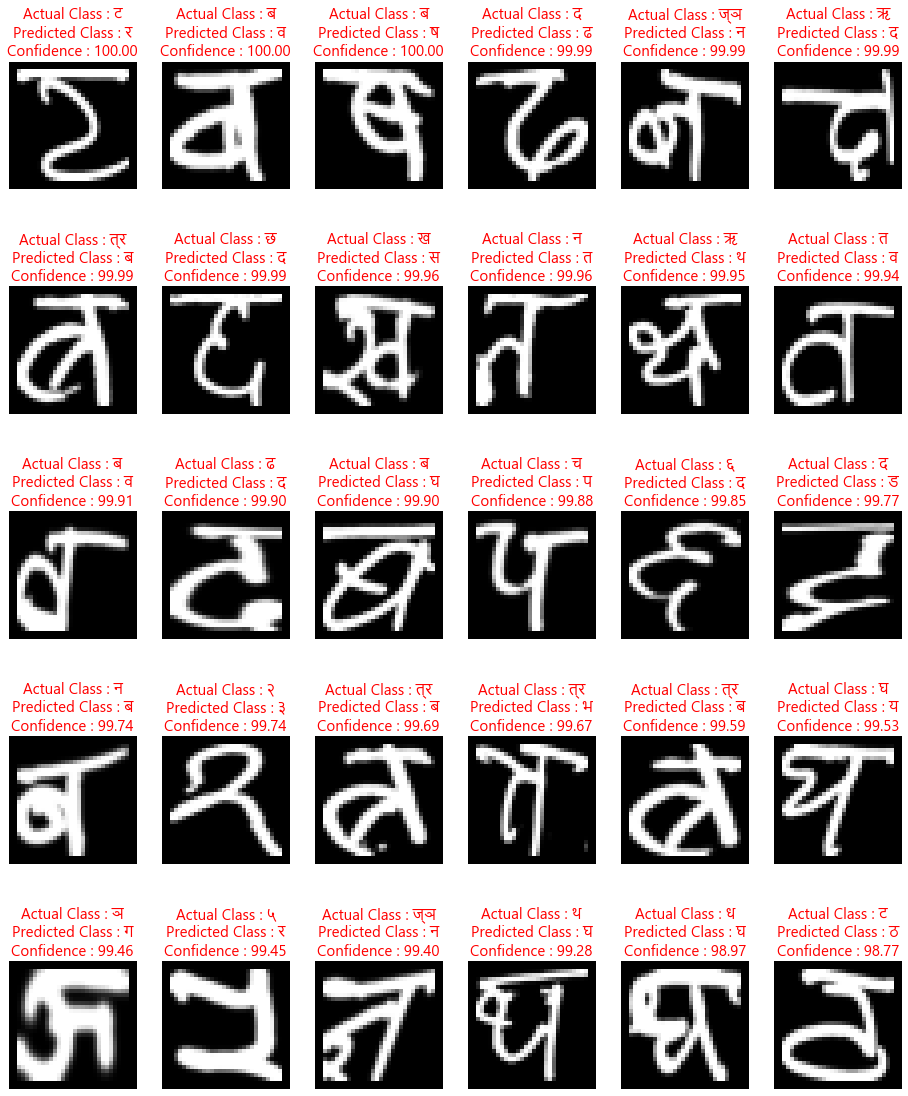

In [ ]:
model_8.load_weights(checkpoint_path8)  # Load the model 8

predicted_probability = model_8.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 9 : Transfer Learning : VGG16

## Defining callbacks

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_9/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path9 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"VGG16_TL_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path9,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16  # Import VGG16 model

In [ ]:
rescale = tf.keras.Sequential([    # Sequential layer for normalizing the input
  layers.Rescaling(1./255),
])

In [ ]:
# Define the base model
base_model = VGG16(include_top=False) # include_top=False : Don't include the fully-connected layers at the top of the network.

base_model.trainable = False  # freeze all of its layers.

input = layers.Input(shape=(32,32,3))  # shape of input image

x = rescale(input)    # Normalize the image

x = base_model(x) # Pass the inputs to the base_model

x = layers.GlobalAveragePooling2D()(x) # pool the base model's results.

x = layers.Dense(128,activation='relu')(x)

output = layers.Dense(len(class_names_) , activation='softmax')(x)

model_9 = tf.keras.Model(input , output)  # Make a model by putting together the inputs and the outputs.  

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model_9.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Examine the layers in our model-9.
for layer in model_9.layers:
  print(layer.name)

input_2
sequential
vgg16
global_average_pooling2d
dense
dense_1


3rd layer is our base model layer.<br>

In [ ]:
# Check our base model's layers to see which ones can be trained and which ones can't.
for layer in model_9.layers[2].layers:
  print(layer.name , layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


None of the base model's layers are trainable, as we have set the trainable=False

In [ ]:
# Unfreeze the all the layers --> Make all layers trainable since we have a large amount of data
base_model.trainable = True

In [ ]:
# Verify whether all the layers are trainable or not.
for layer in model_9.layers[2].layers:
  print(layer.name , layer.trainable)

input_1 True
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


  All layers are now trainable, and we are ready to train the model.

In [ ]:
# Check the model summary
model_9.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential_14 (Sequential)  (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 dense_22 (Dense)            (None, 46)                5934      
                                                           

In [ ]:
# Fit the model
model_9_history = model_9.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])  

Epoch 1/50
2077/2077 [==============================] - 58s 22ms/step - loss: 1.3013 - accuracy: 0.6627 - val_loss: 0.7015 - val_accuracy: 0.8073 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 55s 26ms/step - loss: 0.5970 - accuracy: 0.8318 - val_loss: 0.4975 - val_accuracy: 0.8583 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 53s 26ms/step - loss: 0.4627 - accuracy: 0.8651 - val_loss: 0.4371 - val_accuracy: 0.8718 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 53s 26ms/step - loss: 0.3942 - accuracy: 0.8847 - val_loss: 0.3851 - val_accuracy: 0.8860 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 53s 25ms/step - loss: 0.3505 - accuracy: 0.8956 - val_loss: 0.3638 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 54s 26ms/step - loss: 0.3191 - accuracy: 0.9048 - val_loss: 0.3413 - val_accuracy: 0.8960 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_9_results = model_9.evaluate(testting_dataset)
model_9_results

432/432 [==============================] - 4s 10ms/step - loss: 0.2421 - accuracy: 0.9317


[0.24211928248405457, 0.9316666722297668]

**Model 9** has an accuracy of **`93.16 %`** , which is lower than any previous model we build.

It would appear that transfer learning was not fruitful.

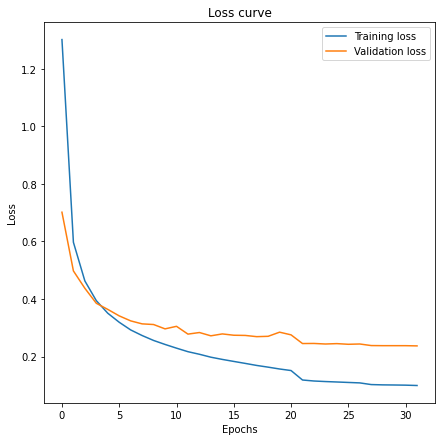

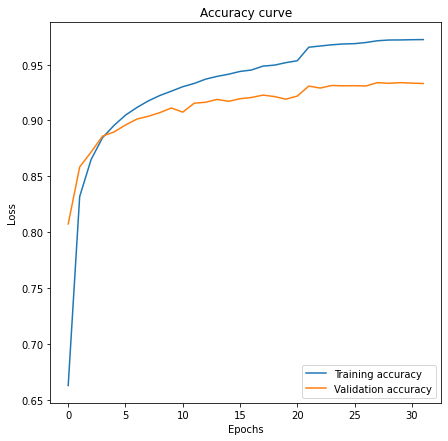

In [ ]:
# Display loss and accuracy curves for model 9
display_loss_accuracy_curves(model_9_history)

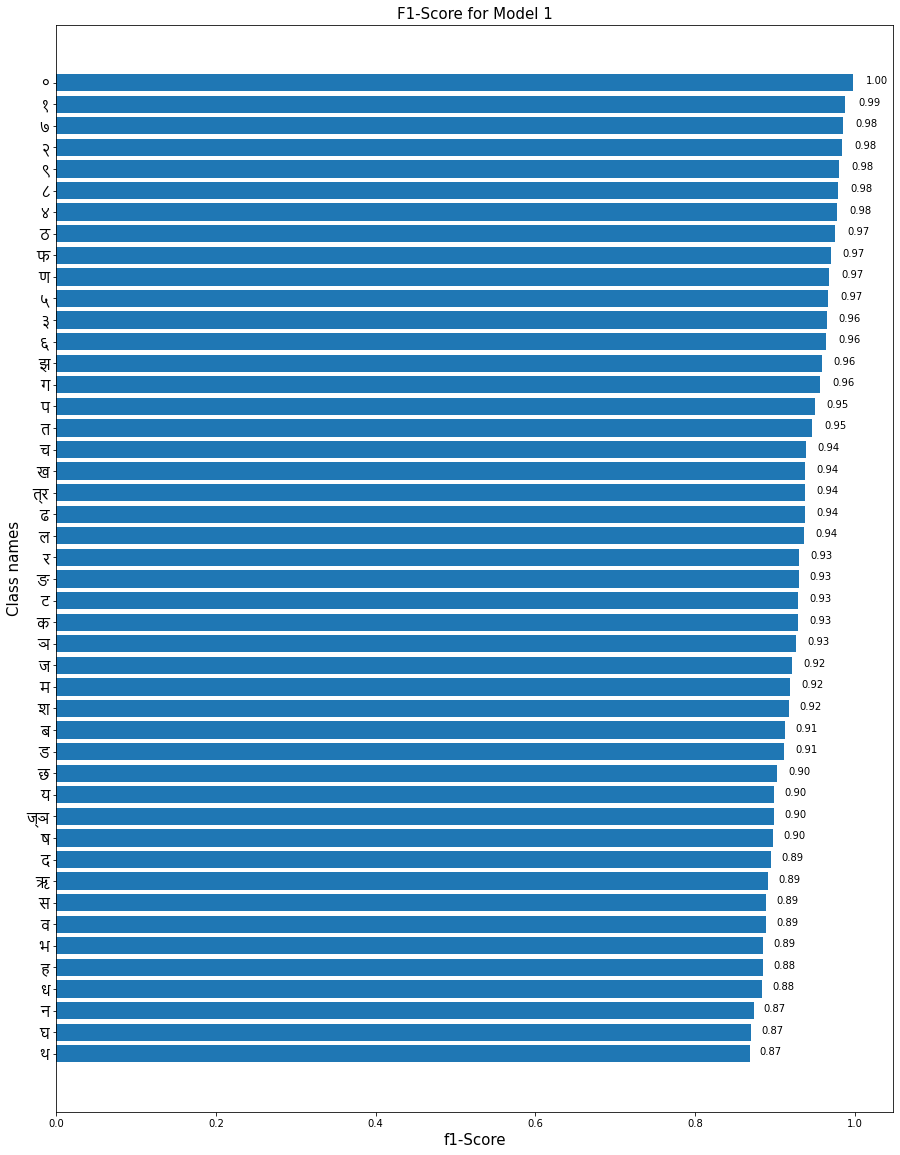

In [ ]:
# Plot the f1-score of each class for model 9
predicted_probability = model_9.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)
generate_f1_bar_plot(y_true,predicted_class)

# Model 9 - Error Analysis

## Get the most wrong predictions

We have only 961 images that did not match our predictions, out of a total of 13800 images 
Among those 961 images some of them are displayed below




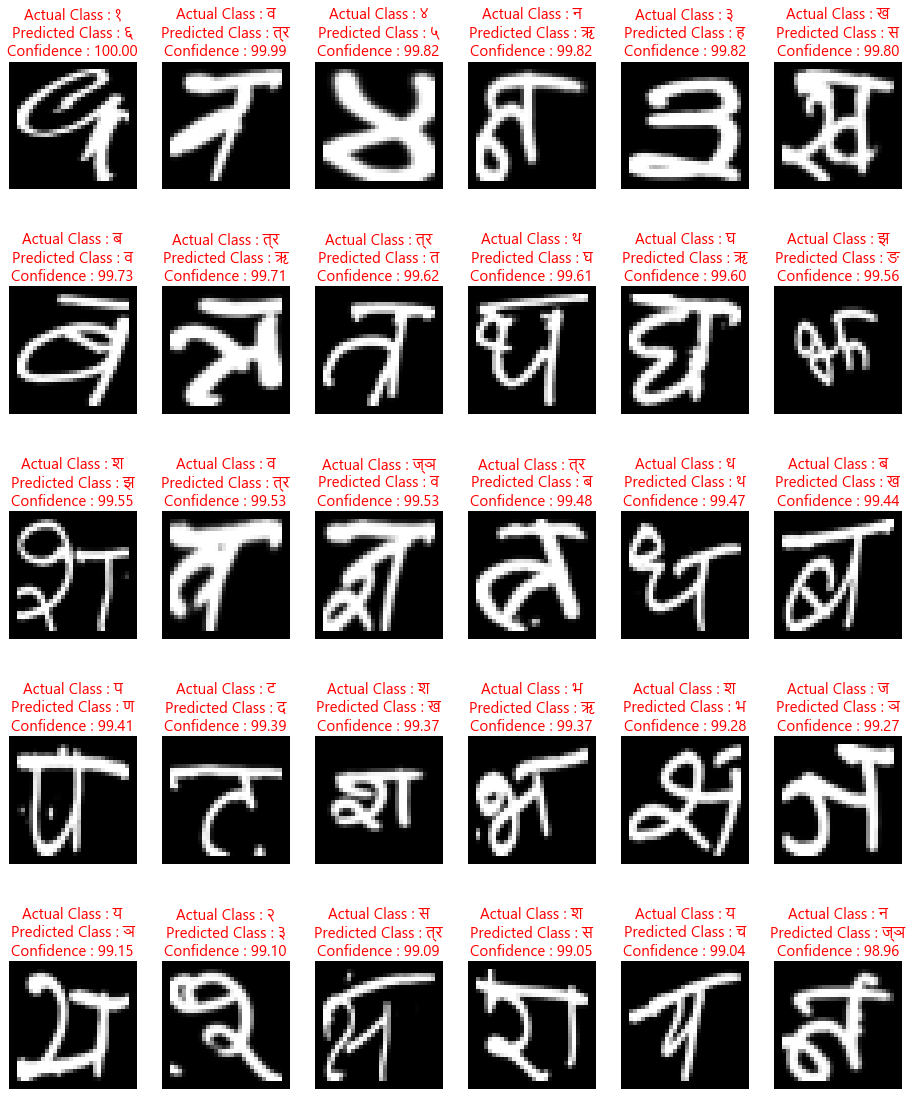

In [ ]:
model_9.load_weights(checkpoint_path9)  # Load the model 9

predicted_probability = model_9.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 10: Transfer Learning : ResNet

## Defining Callbacks for model - 10

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_10/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path10 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"ResNet_TL_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path10,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
# Define a base model using the tf.keras.applications 
base_model = tf.keras.applications.ResNet50(include_top=False)

# Freeze the base model 
base_model.trainable=False

input = layers.Input(shape=(32,32,3))  # Input for the base model

x = rescale(input)    # Rescale the input image

x = base_model(x)  # pass the scaled image to the model

x = layers.GlobalAvgPool2D()(x) # collect the most relevant data 

# Final Dense layer
output = layers.Dense(len(class_names_) , activation='softmax')(x)

model_10 = tf.keras.Model(input,output) # Create a model by combining the inputs and the outputs

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Compile the model
model_10.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Check all the layers of base model
for layer in base_model.layers:
  print(layer.name , layer.trainable)

input_17 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_co

In [ ]:
# All of the layers in the base model are  unfreeze.
base_model.trainable=True

# Refreeze all layers except the last 20.
for layer in base_model.layers[:-20]:
  layer.trainable=False

In [ ]:
# Examine the last 20 layers to see if they are trainable or not.
for layer in base_model.layers:
  print(layer.name , layer.trainable)

input_17 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_co

In [ ]:
# Fit the model
model_10_history = model_10.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback])    # 45-50 Min

Epoch 1/50
2077/2077 [==============================] - 54s 20ms/step - loss: 2.2360 - accuracy: 0.4264 - val_loss: 1.7160 - val_accuracy: 0.5501 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 45s 22ms/step - loss: 1.5311 - accuracy: 0.5913 - val_loss: 1.4394 - val_accuracy: 0.6081 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 42s 20ms/step - loss: 1.3074 - accuracy: 0.6455 - val_loss: 1.2664 - val_accuracy: 0.6518 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 42s 20ms/step - loss: 1.1779 - accuracy: 0.6768 - val_loss: 1.1574 - val_accuracy: 0.6800 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 41s 20ms/step - loss: 1.0903 - accuracy: 0.6987 - val_loss: 1.1175 - val_accuracy: 0.6907 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 45s 22ms/step - loss: 1.0248 - accuracy: 0.7155 - val_loss: 1.0410 - val_accuracy: 0.7090 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

In [ ]:
model_10_results = model_10.evaluate(testting_dataset)
model_10_results

432/432 [==============================] - 8s 19ms/step - loss: 0.6502 - accuracy: 0.8180


[0.6502106189727783, 0.8179709911346436]

**`81.79%`** accuracy for this model is the lowest of any model that we obtain.

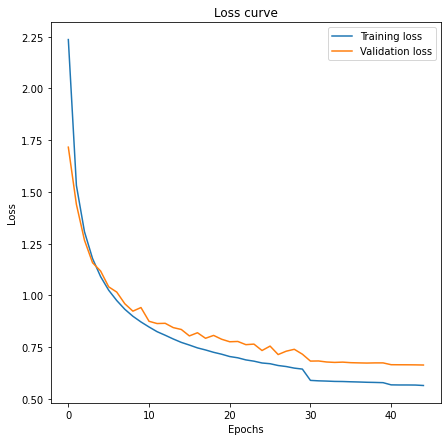

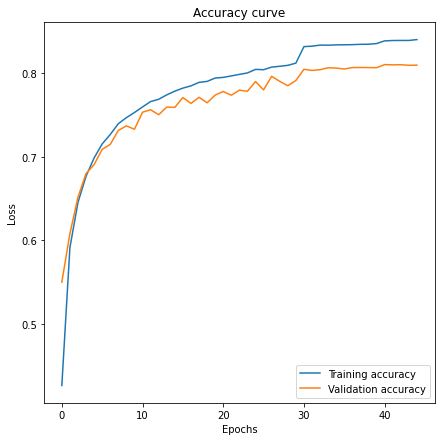

In [ ]:
display_loss_accuracy_curves(model_10_history)

In [ ]:
model_10.load_weights(checkpoint_path10) # Load model 10

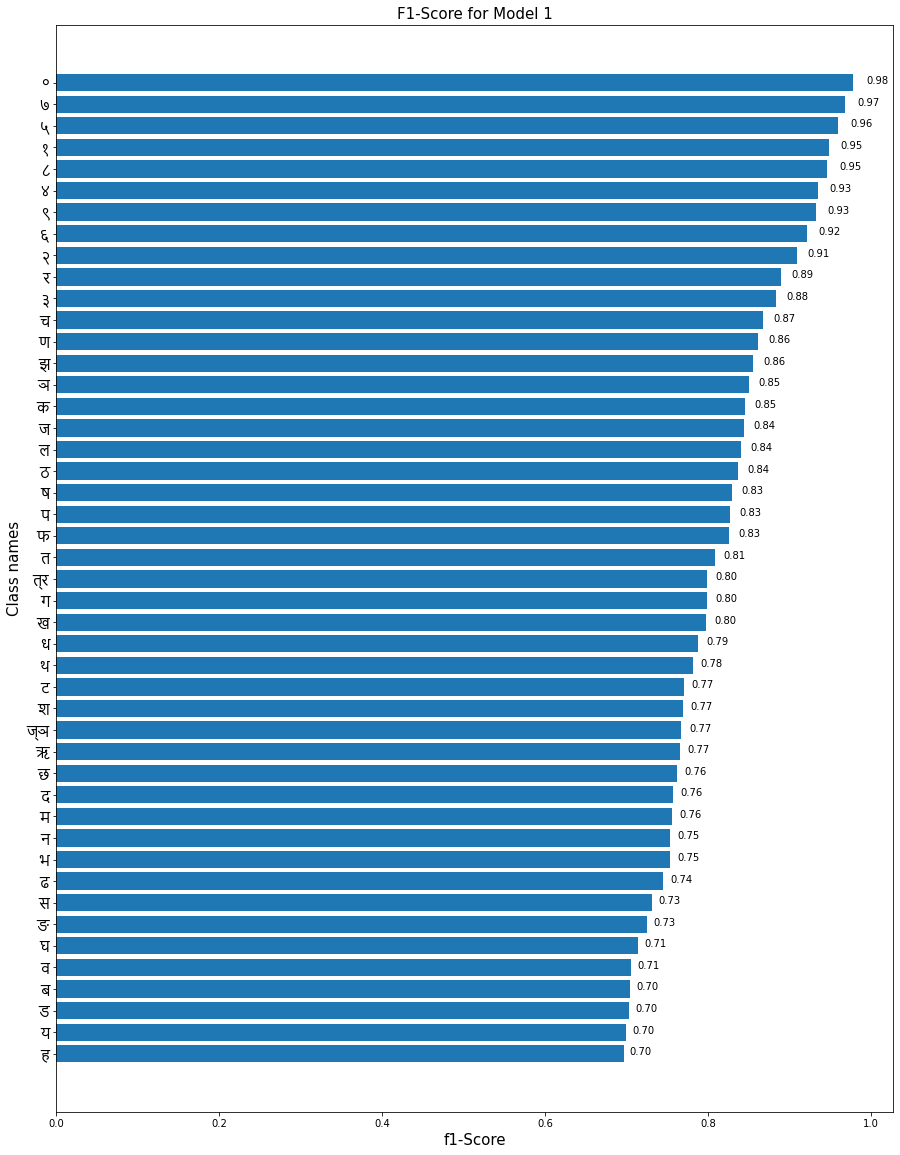

In [ ]:
# Display f1-score of ecah class for model - 10
predicted_probability = model_10.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

generate_f1_bar_plot(y_true,predicted_class)

# Model 10 - Error Analysis

## Get the most wrong predictions

We have only 2516 images that did not match our predictions, out of a total of 13800 images 
Among those 2516 images some of them are displayed below




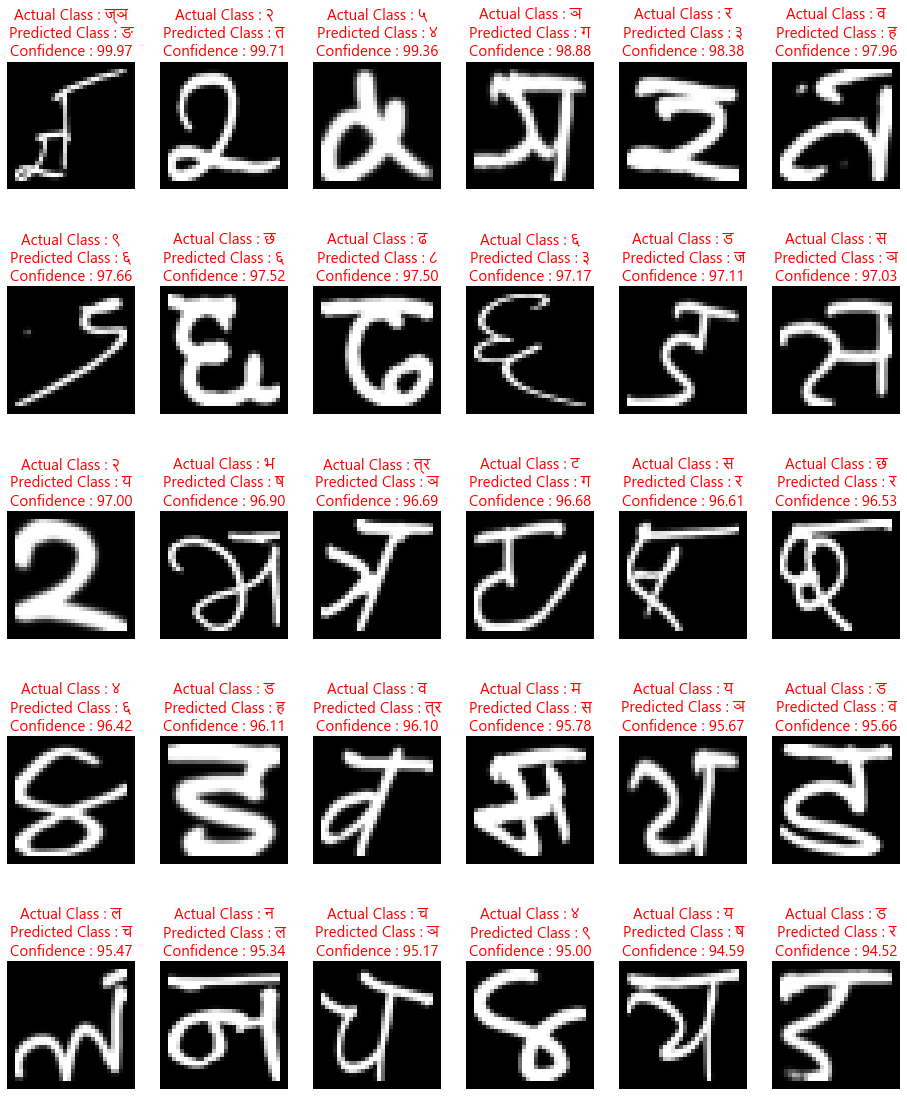

In [ ]:
# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Model 11: Transfer Learning : ResNet part 2
The last 20 layers of the Model 10 are the only ones that were trainable. In this model 11, we make all of the layers tranable.

## Defining callbacks for model 11

In [ ]:
import datetime

# TensorBoard CallBack
log_dir = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/"+"Model_11/"+\
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# ModelCheckPoint CallBack

checkpoint_path11 = "/content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/ModelCheckPointCallbacks/"+"ResNet_TL_2_ModelCheckPoint_callback/"+\
                      "checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path11,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         monitor='val_accuracy')
# EarlyStopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=4)

# ReduceLROnPlateau
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                 factor = 0.2,
                                                 min_lr = 1e-7,
                                                 patience=3)

In [ ]:
# Define a base model using the tf.keras.applications 
base_model = tf.keras.applications.ResNet50(include_top=False)
# Freeze the base model 
base_model.trainable=False

# Input for the base model
input = layers.Input(shape=(32,32,3))

# Rescale the input image
x = rescale(input)

# pass the scaled image to the model
x = base_model(x)

# collect the most relevant data 
x = layers.GlobalAvgPool2D()(x)

# Final Dense layer
output = layers.Dense(len(class_names_) , activation='softmax')(x)

model_11 = tf.keras.Model(input,output) # # Create a model by combining the inputs and the outputs

In [ ]:
# Compile the model
model_11.compile(loss = 'categorical_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [ ]:
# Set all the layers traianble
base_model.trainable=True

In [ ]:
# Fit the model
model_11_history = model_11.fit(training_data,
                        epochs = 50 ,
                        steps_per_epoch = len(training_data) ,
                        validation_data = validation_data,
                        validation_steps = len(validation_data),
                        callbacks=[tensorboard_callback,checkpoint_callback,early_stopping,reduce_lr_callback]) 

Epoch 1/50
2077/2077 [==============================] - 52s 23ms/step - loss: 2.2390 - accuracy: 0.4249 - val_loss: 1.7328 - val_accuracy: 0.5453 - lr: 0.0010
Epoch 2/50
2077/2077 [==============================] - 44s 21ms/step - loss: 1.5340 - accuracy: 0.5905 - val_loss: 1.4330 - val_accuracy: 0.6115 - lr: 0.0010
Epoch 3/50
2077/2077 [==============================] - 43s 21ms/step - loss: 1.3100 - accuracy: 0.6446 - val_loss: 1.2863 - val_accuracy: 0.6478 - lr: 0.0010
Epoch 4/50
2077/2077 [==============================] - 45s 22ms/step - loss: 1.1811 - accuracy: 0.6774 - val_loss: 1.1760 - val_accuracy: 0.6787 - lr: 0.0010
Epoch 5/50
2077/2077 [==============================] - 49s 24ms/step - loss: 1.0909 - accuracy: 0.6986 - val_loss: 1.0833 - val_accuracy: 0.7036 - lr: 0.0010
Epoch 6/50
2077/2077 [==============================] - 44s 21ms/step - loss: 1.0244 - accuracy: 0.7167 - val_loss: 1.0512 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 7/50
2077/2077 [========================

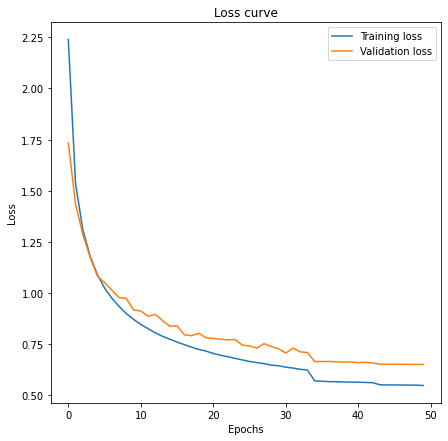

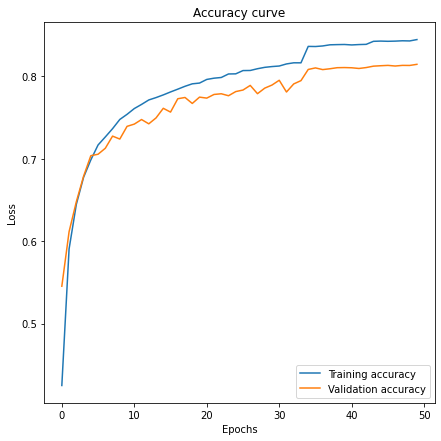

In [ ]:
display_loss_accuracy_curves(model_11_history)

In [ ]:
model_11.load_weights(checkpoint_path11) # Load the model 11

In [ ]:
model_11.evaluate(testting_dataset)

432/432 [==============================] - 9s 16ms/step - loss: 0.6382 - accuracy: 0.8210


[0.6381617188453674, 0.8210144639015198]

**Model 11** provides us with an accuracy of **`82.10%`**, which is a minor step up from model 10's accuracy.

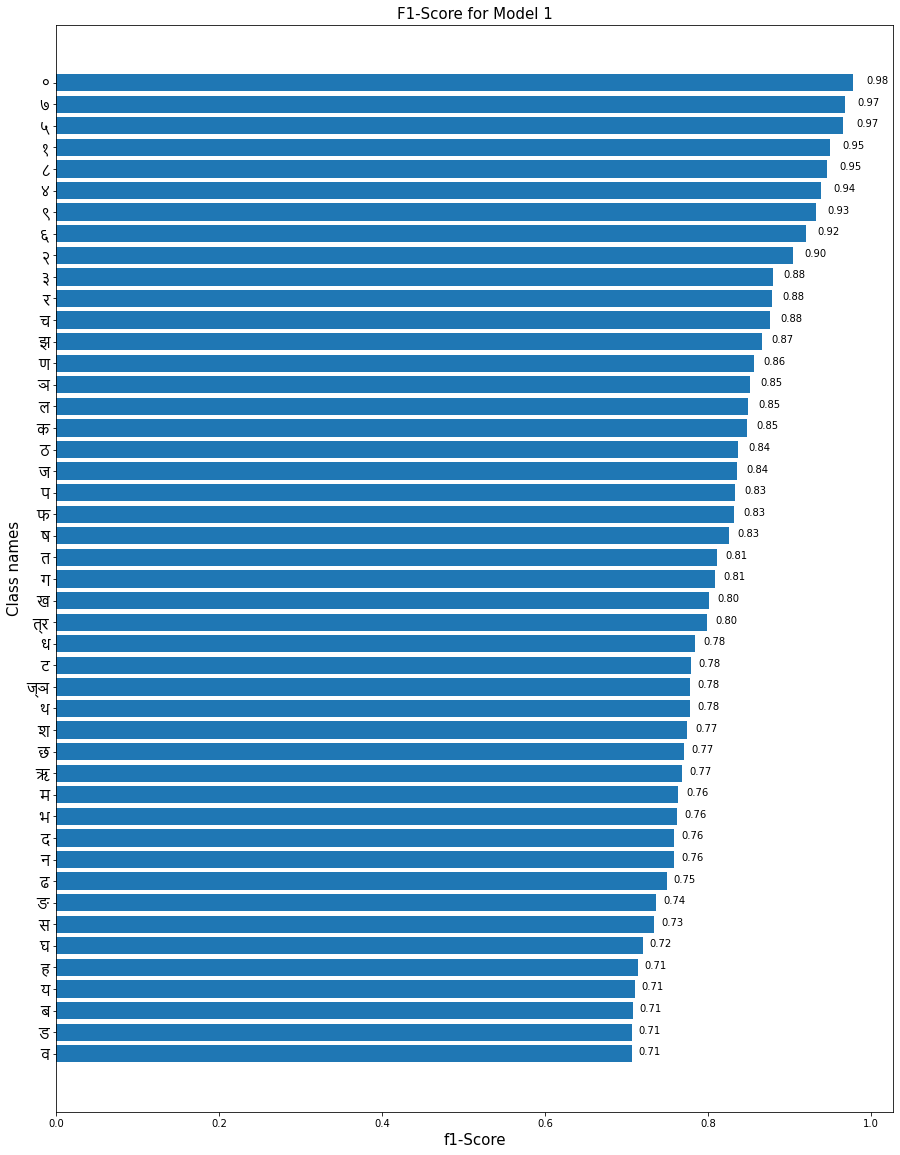

In [ ]:
# Plot f1-score of each class for model 11
predicted_probability = model_11.predict(testting_dataset)
predicted_class = predicted_probability.argmax(axis=1)

generate_f1_bar_plot(y_true,predicted_class)

# Model 11 - Error Analysis

## Get the most wrong predictions

We have only 2470 images that did not match our predictions, out of a total of 13800 images 
Among those 2470 images some of them are displayed below




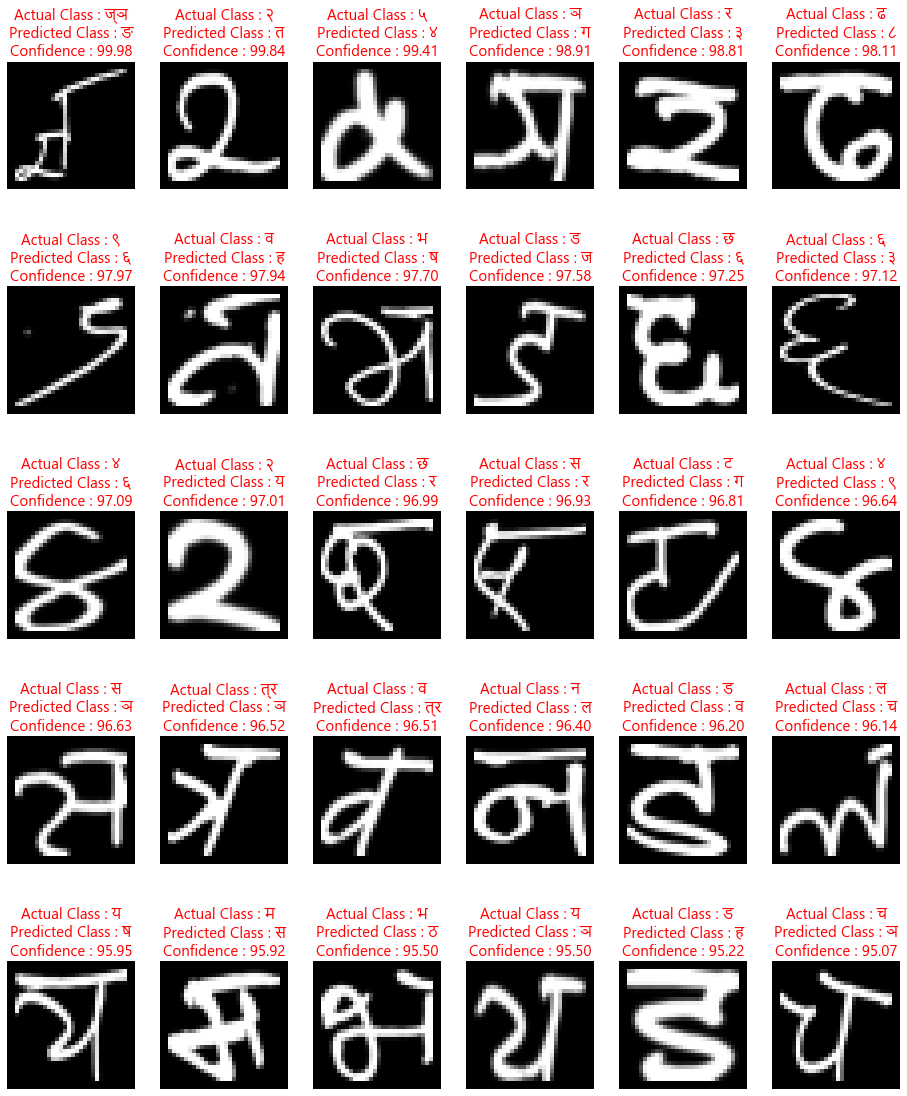

In [ ]:
# Create a dataframe out of current prediction data for error analysis

df = pd.DataFrame(data={"image_paths":image_paths,
                        "y_true" : y_true,
                        "y_pred" : predicted_class,
                        "prediction_confidence":predicted_probability.max(axis=1),
                        "Actual_class":[hindi_character_[i] for i in y_true],
                        "Predicted_class" : [hindi_character_[i] for i in predicted_class]})

# Get dataframe having wrong predictions
wrong_df = df[df['y_true'] != df['y_pred']].sort_values(by='prediction_confidence',ascending=False)
print(f"We have only {len(wrong_df)} images that did not match our predictions, out of a total of 13800 images \nAmong those {len(wrong_df)} images some of them are displayed below\n\n")

# Display wrong predicted images
display_wrong_prediction(data=wrong_df[:30],
                         subplots = (5,6),
                         figsize=(16,20),
                         fontsize=15)

# Best Performing Model

In [ ]:
# Load all the models
model_1.load_weights(checkpoint_path)
model_2.load_weights(checkpoint_path2)
model_3.load_weights(checkpoint_path3)
model_4.load_weights(checkpoint_path4)
model_5.load_weights(checkpoint_path5)
model_6.load_weights(checkpoint_path6)
model_7.load_weights(checkpoint_path7)
model_8.load_weights(checkpoint_path8)
model_9.load_weights(checkpoint_path9)
model_10.load_weights(checkpoint_path10)
model_11.load_weights(checkpoint_path11)


In [ ]:
# Get the accuracy of each model
model_accuracy = []
all_models=[model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11]
for model in tqdm(all_models):
  model_accuracy.append(model.evaluate(testting_dataset)[1]*100)  

  0%|          | 0/11 [00:00<?, ?it/s]

432/432 [==============================] - 12s 23ms/step - loss: 0.6382 - accuracy: 0.8210


In [ ]:
# Set the model names
model_names="Model_1_LeNet model_2_LeNet_BD model_3_VGG model_4_VGG_BD model_5_ResNet model_6_ResNet_BD model_7 model_8 model_9_TF_VGG16 model_10_TF_ResNet model_11_TF_ResNet_p2".split()

In [ ]:
# Create a DataFrame for comparision 
all_model_df = pd.DataFrame(data={"Model_Names" : model_names,
                                  "Model_Accuracy" : model_accuracy})

all_model_df

,Model_Names,Model_Accuracy
0,Model_1_LeNet,97.833335
1,model_2_LeNet_BD,98.347825
2,model_3_VGG,98.637682
3,model_4_VGG_BD,99.289852
4,model_5_ResNet,99.275362
5,model_6_ResNet_BD,99.500000
6,model_7,99.057972
7,model_8,98.949277
8,model_9_TF_VGG16,93.036234
9,model_10_TF_ResNet,81.768113


In [ ]:
# Sort the DataFrame according to Model accuracy
all_model_df_sorted = all_model_df.sort_values(by="Model_Accuracy",ascending=False)
all_model_df_sorted

,Model_Names,Model_Accuracy
5,model_6_ResNet_BD,99.500000
3,model_4_VGG_BD,99.289852
4,model_5_ResNet,99.275362
6,model_7,99.057972
7,model_8,98.949277
2,model_3_VGG,98.637682
1,model_2_LeNet_BD,98.347825
0,Model_1_LeNet,97.833335
8,model_9_TF_VGG16,93.036234
10,model_11_TF_ResNet_p2,82.101446


The top three best performing models, as seen in the preceding DataFrame, are as follows:

| Model Name | Model Accuracy |
|-------------------------------------------|----------------|
| Model-6 ResNet+BatchNormalization+Dropout | **99.50 %** |
| Model-4 VGG+BatchNormalization+Dropout | 99.28 % |
| Model-5 ResNet | 99.27 % |

#TensorBoard comparisons of all the models models

In [ ]:
# Model's data uploading to TensorBoard

!tensorboard dev upload --logdir /content/drive/MyDrive/Project_102_Hindi_Character_Recognition/HCR_Phase_04/Callbacks/TensorBoardCallbacks/ \
  --name "Hindi Character Recognition" \
  --description "Comparing all the 9 different models" \
  --one_shot
  

You can view the all models performace from this [link](https://tensorboard.dev/experiment/jNZe9j6mQHq448JPooliBw/)